C:\Users\nicar\AppData\Local\Temp\ipykernel_5208\2753239116.py:22: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_sorted[f"{col} Change (%)"] = df_sorted.groupby("State")[col].pct_change() * 100
C:\Users\nicar\AppData\Local\Temp\ipykernel_5208\2753239116.py:22: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_sorted[f"{col} Change (%)"] = df_sorted.groupby("State")[col].pct_change() * 100
C:\Users\nicar\AppData\Local\Temp\ipykernel_5208\2753239116.py:22: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future ve

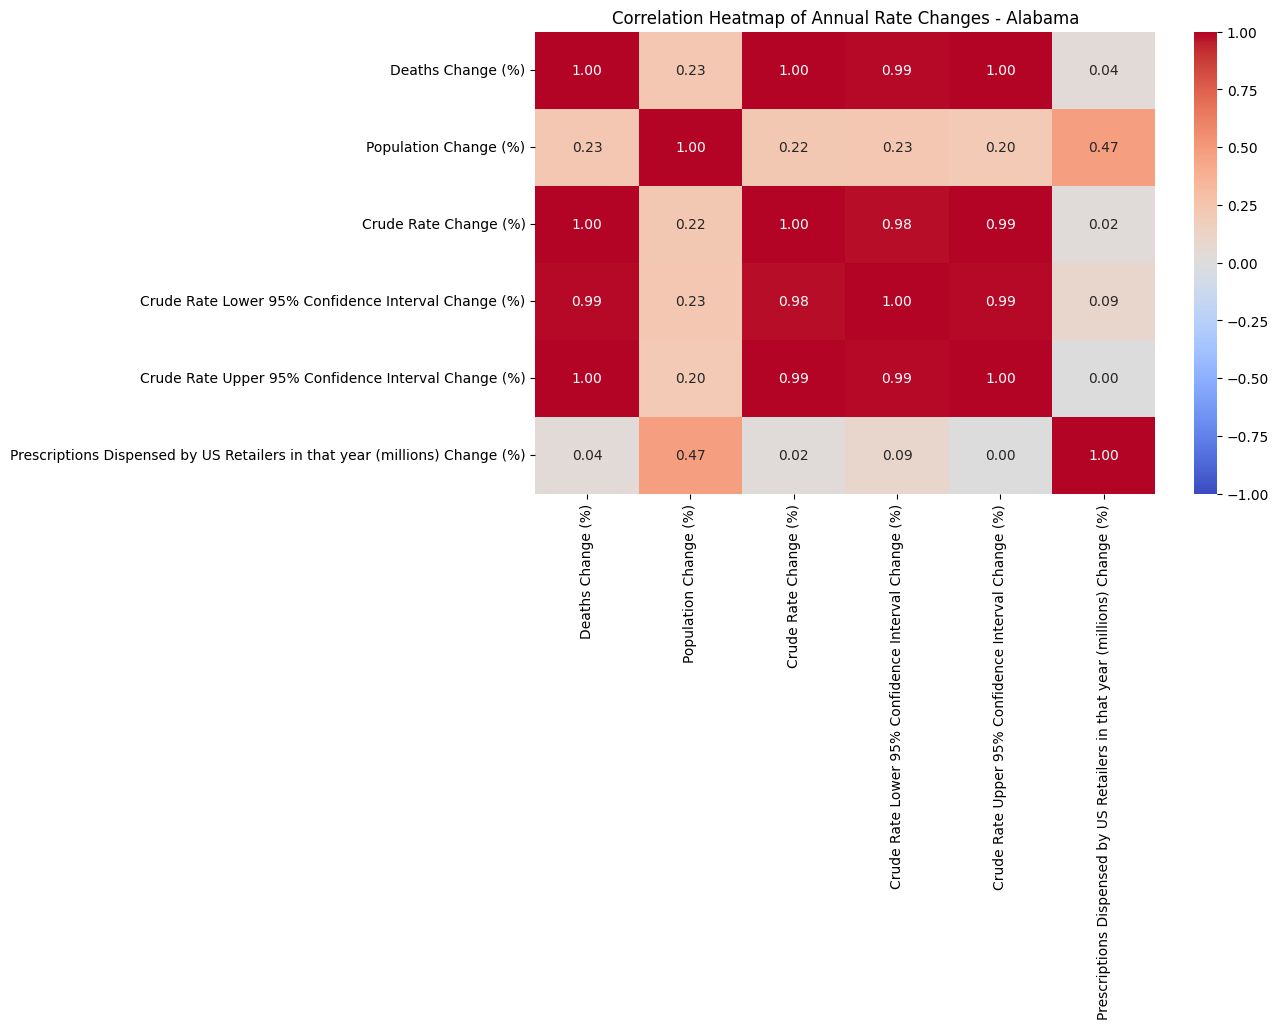

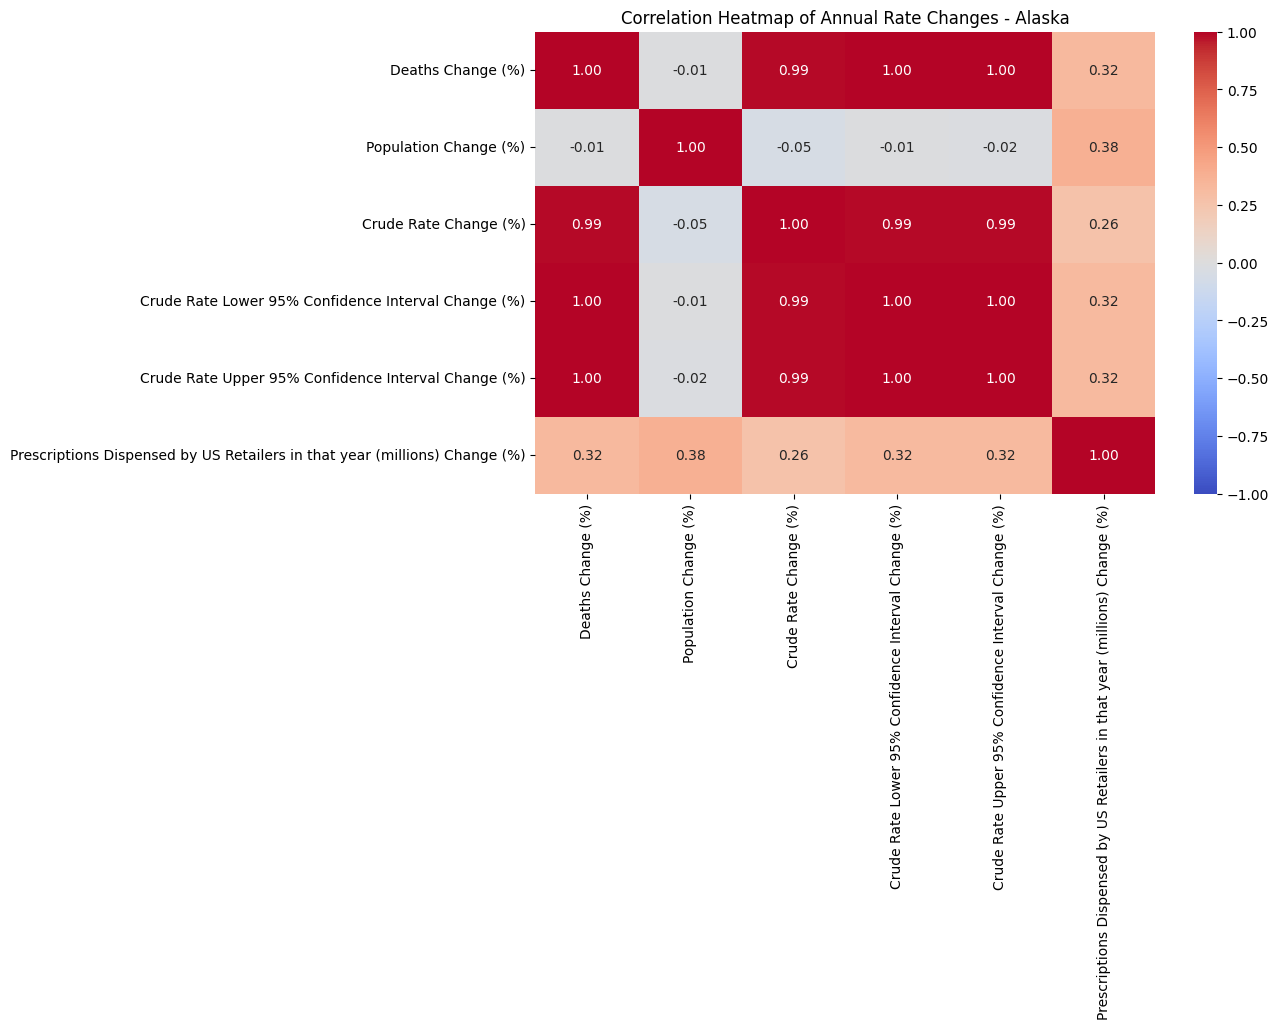

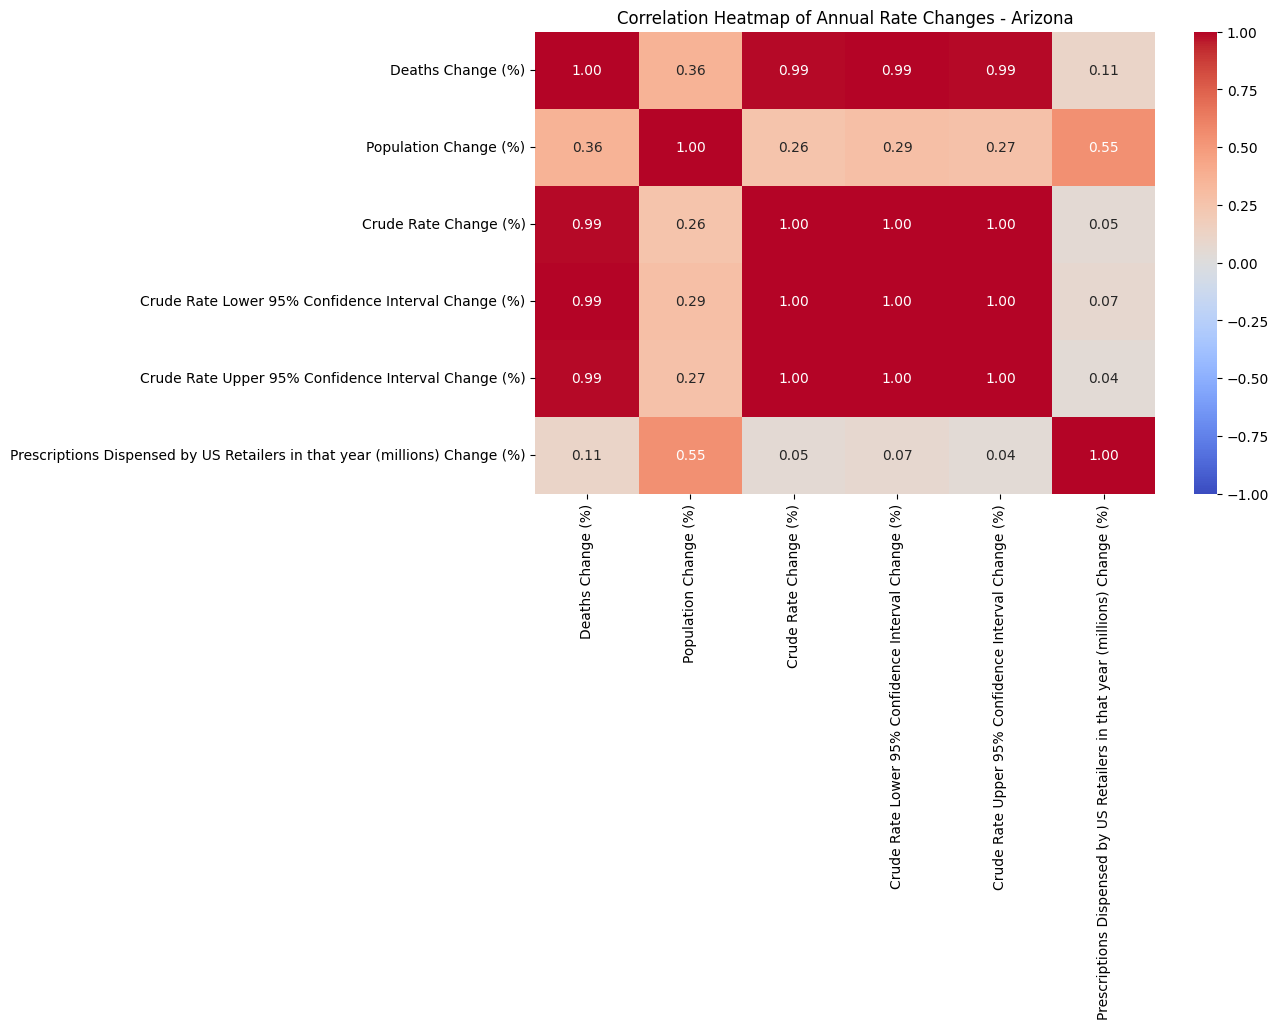

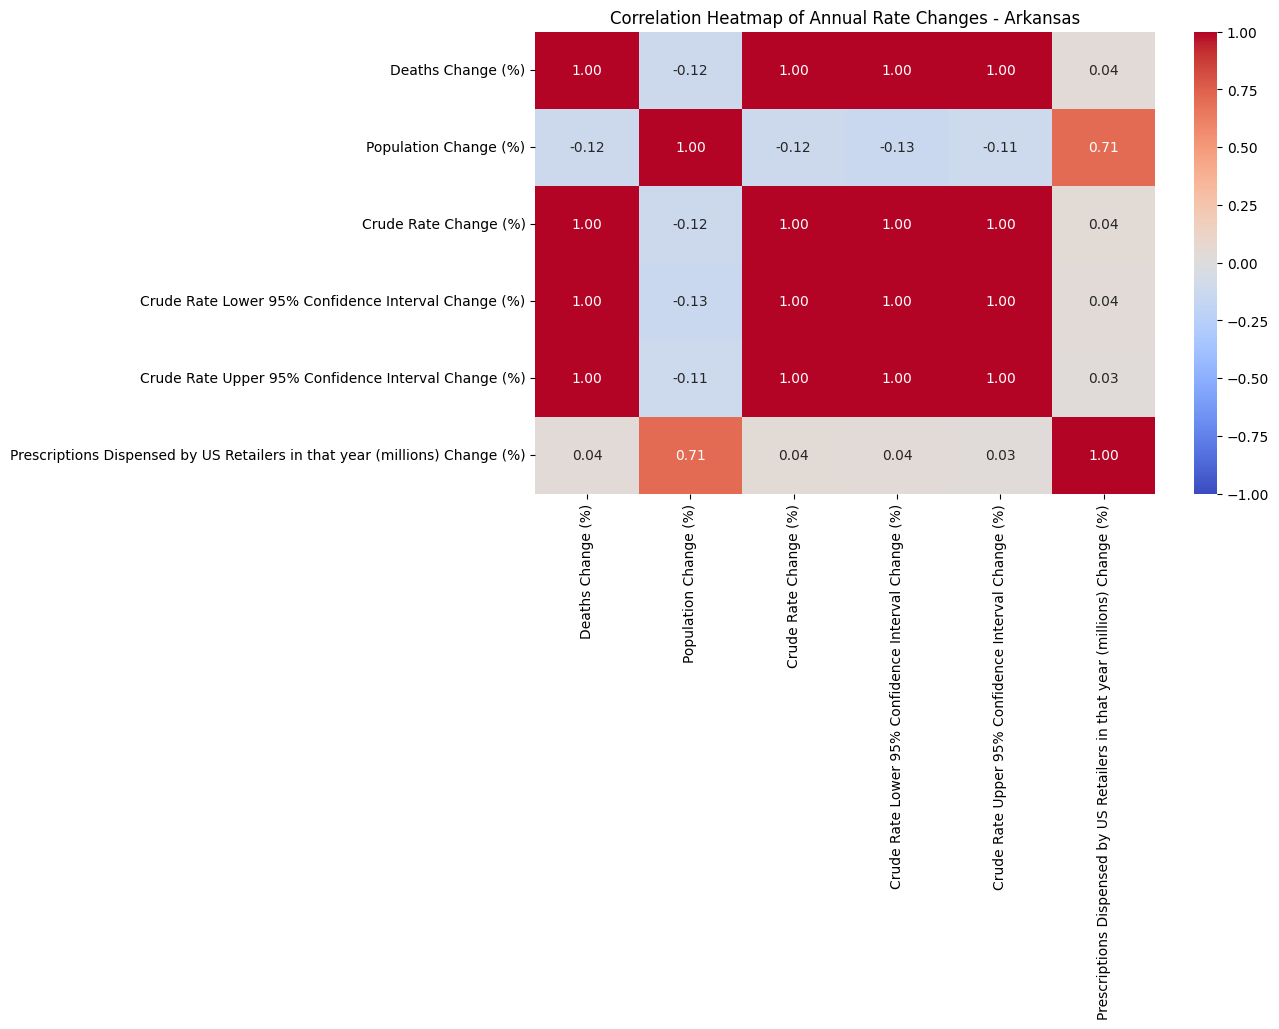

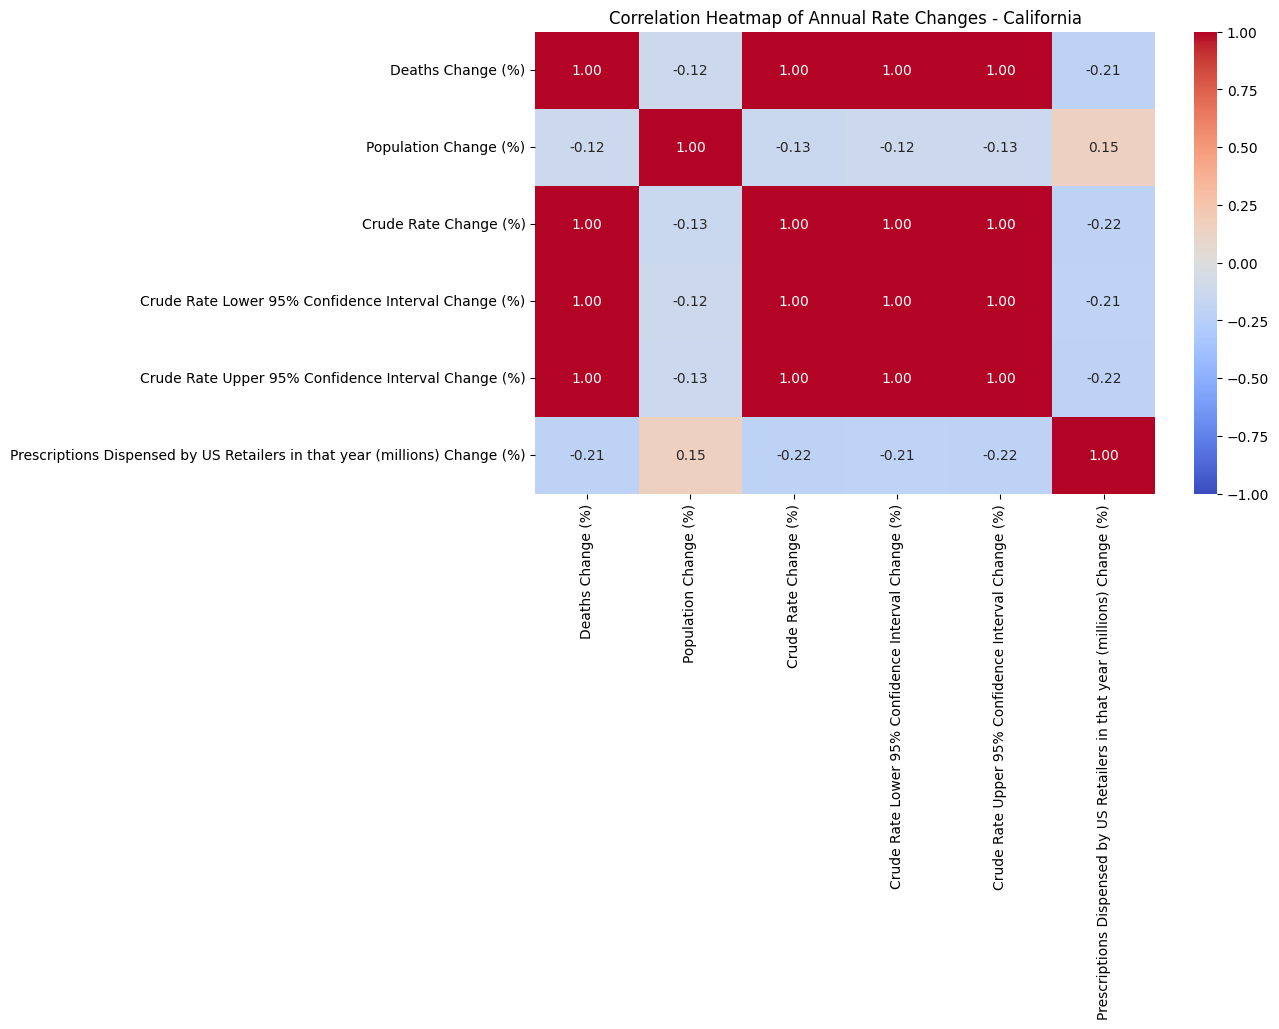

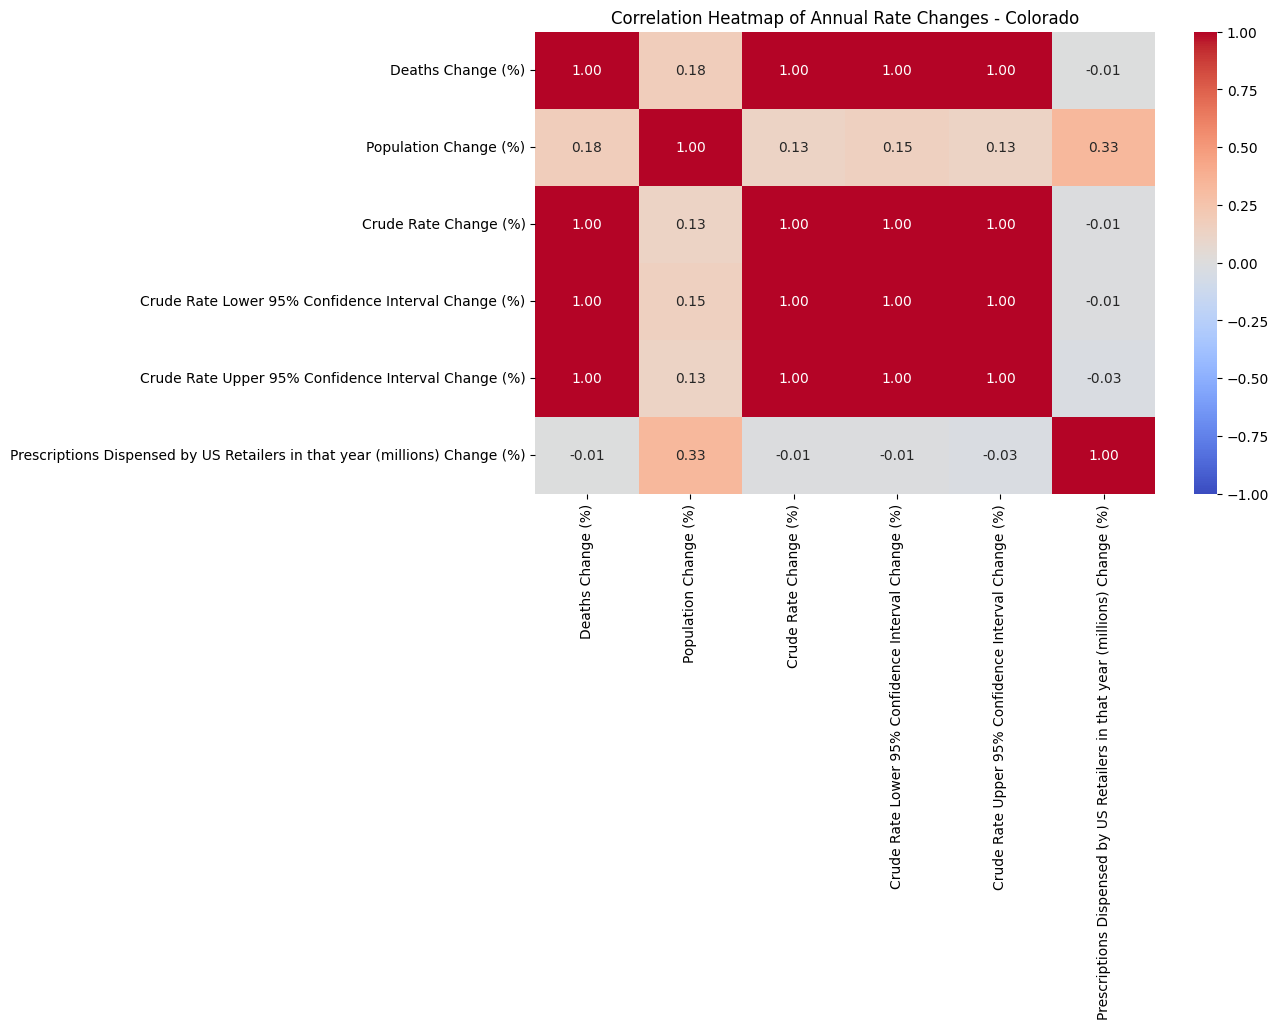

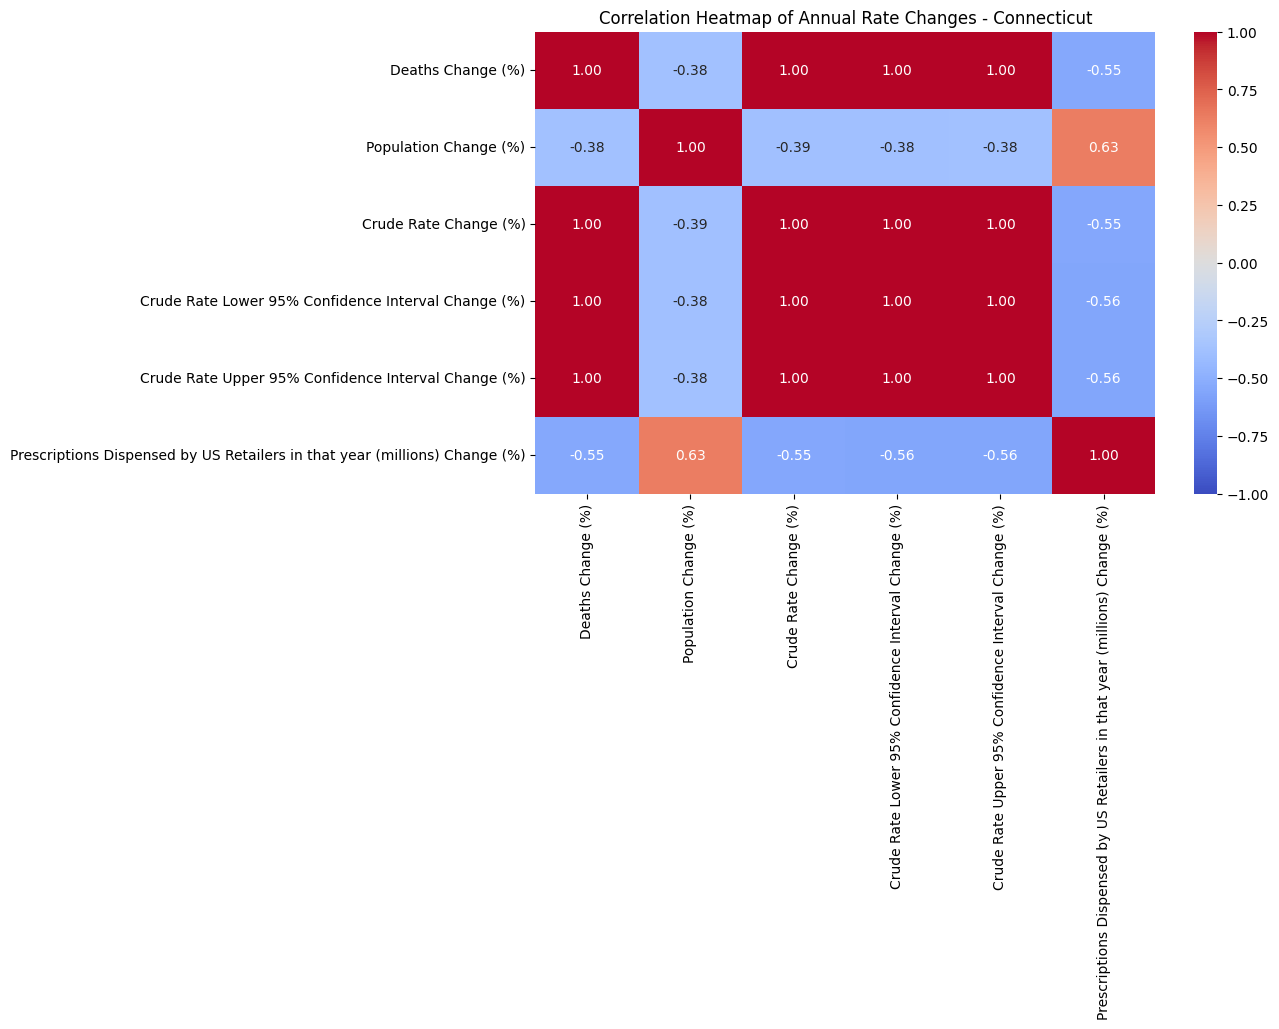

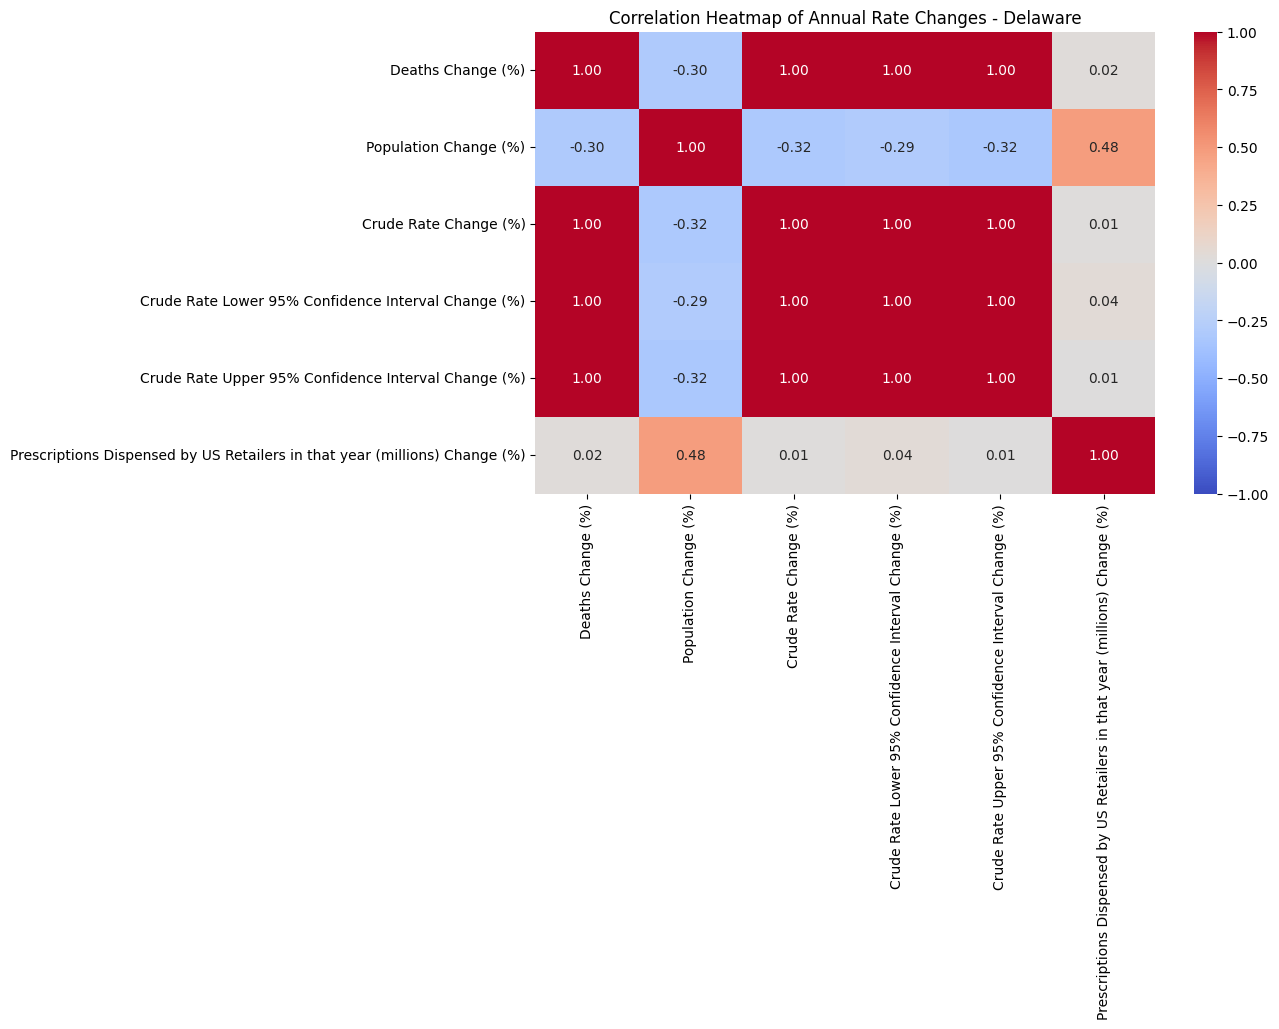

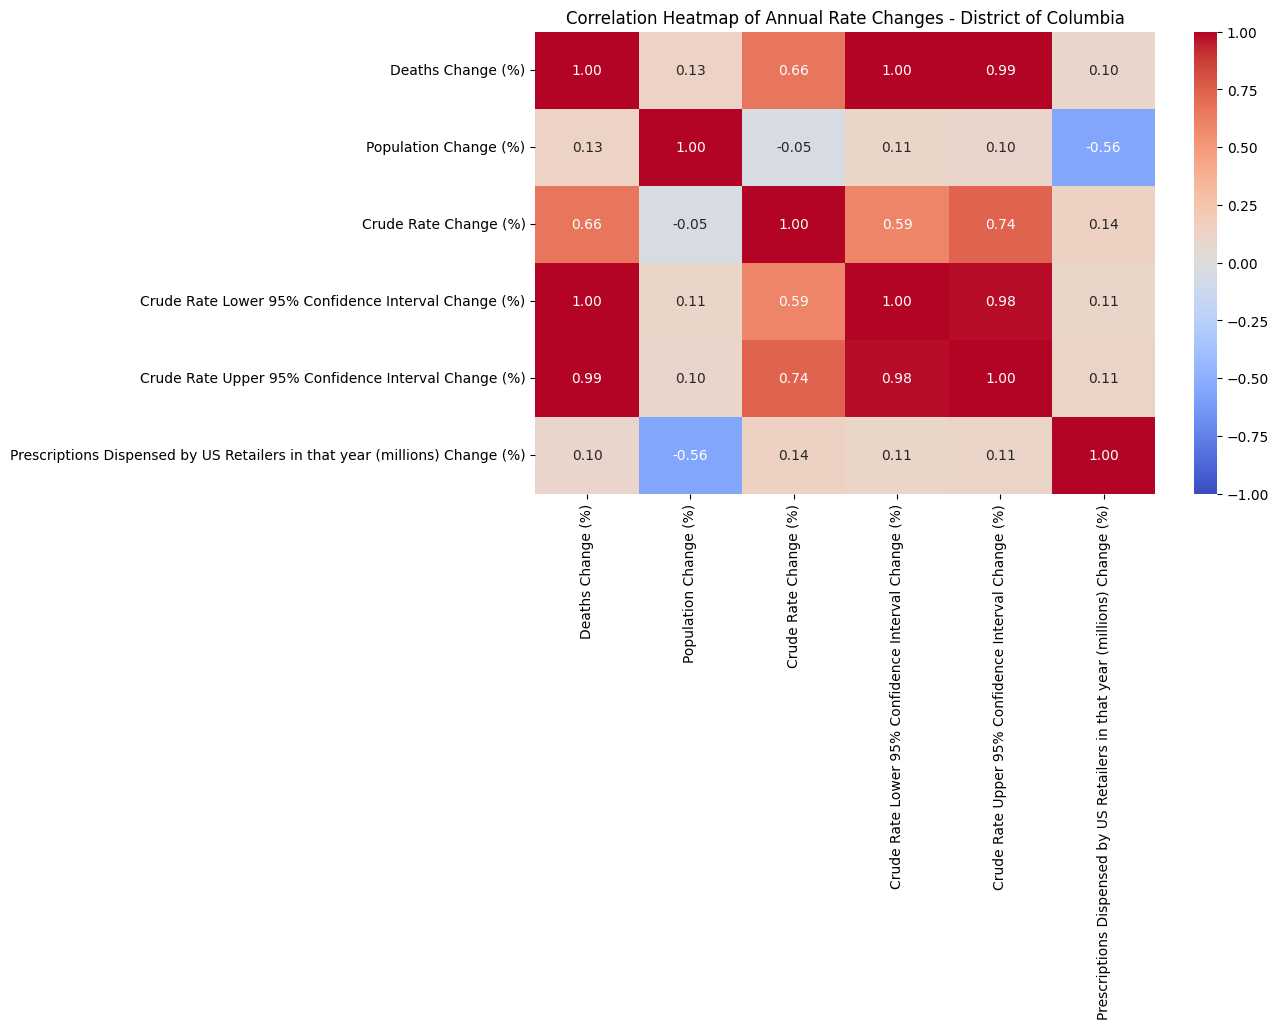

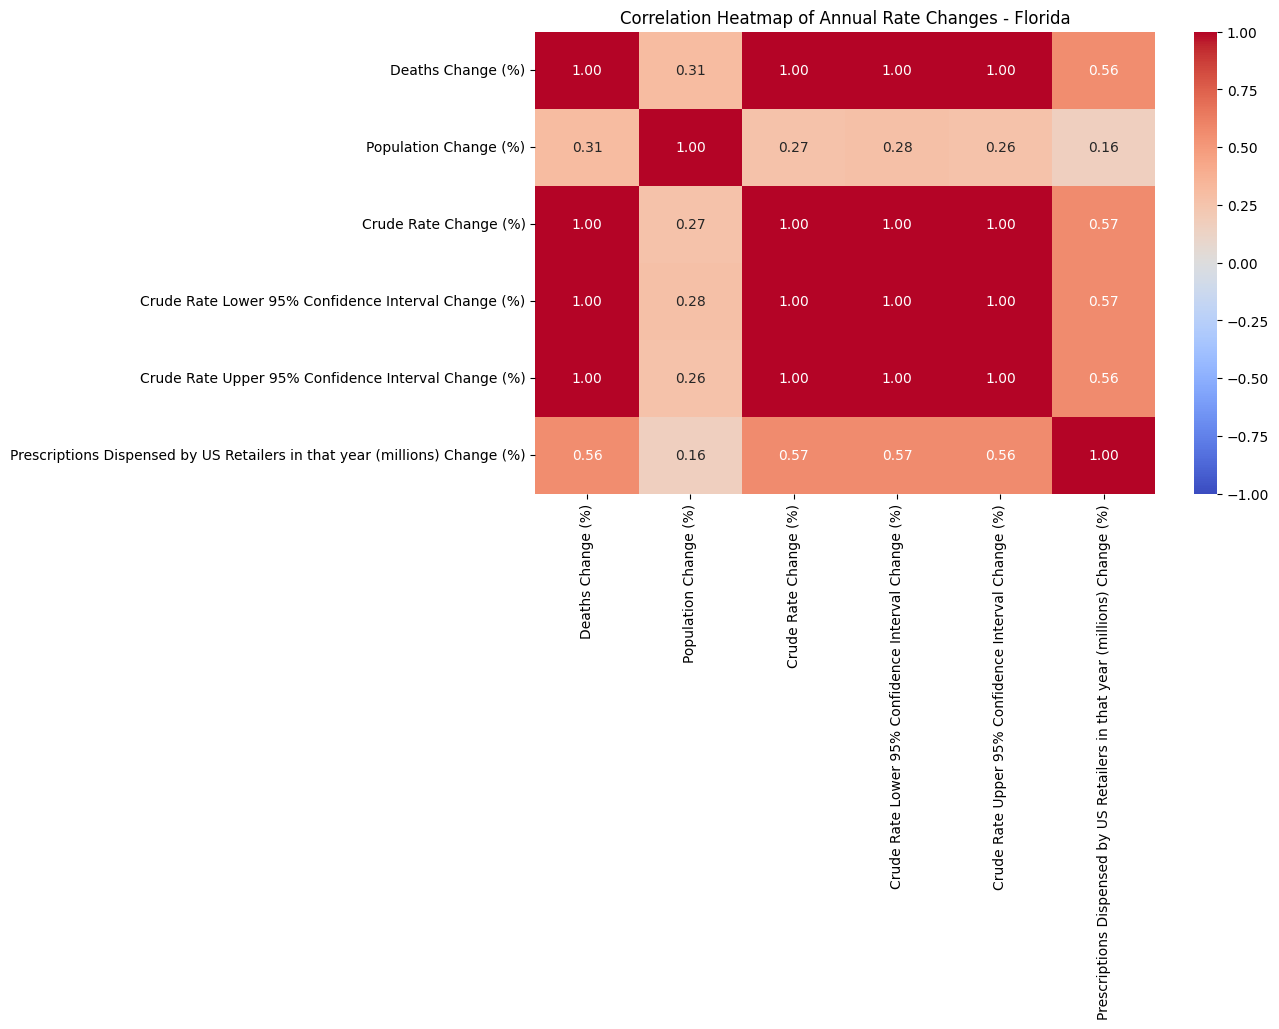

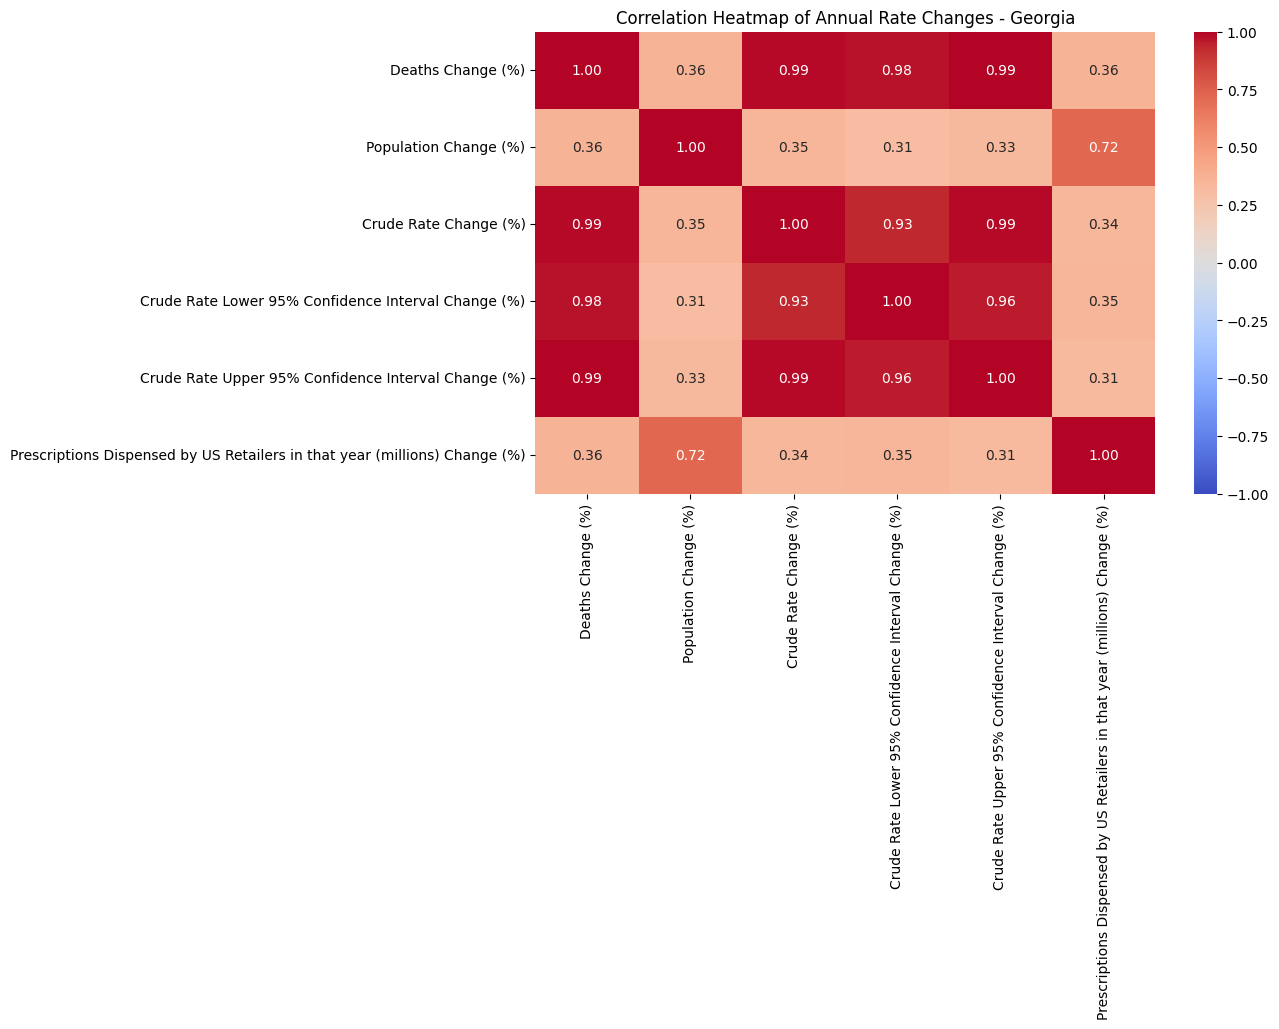

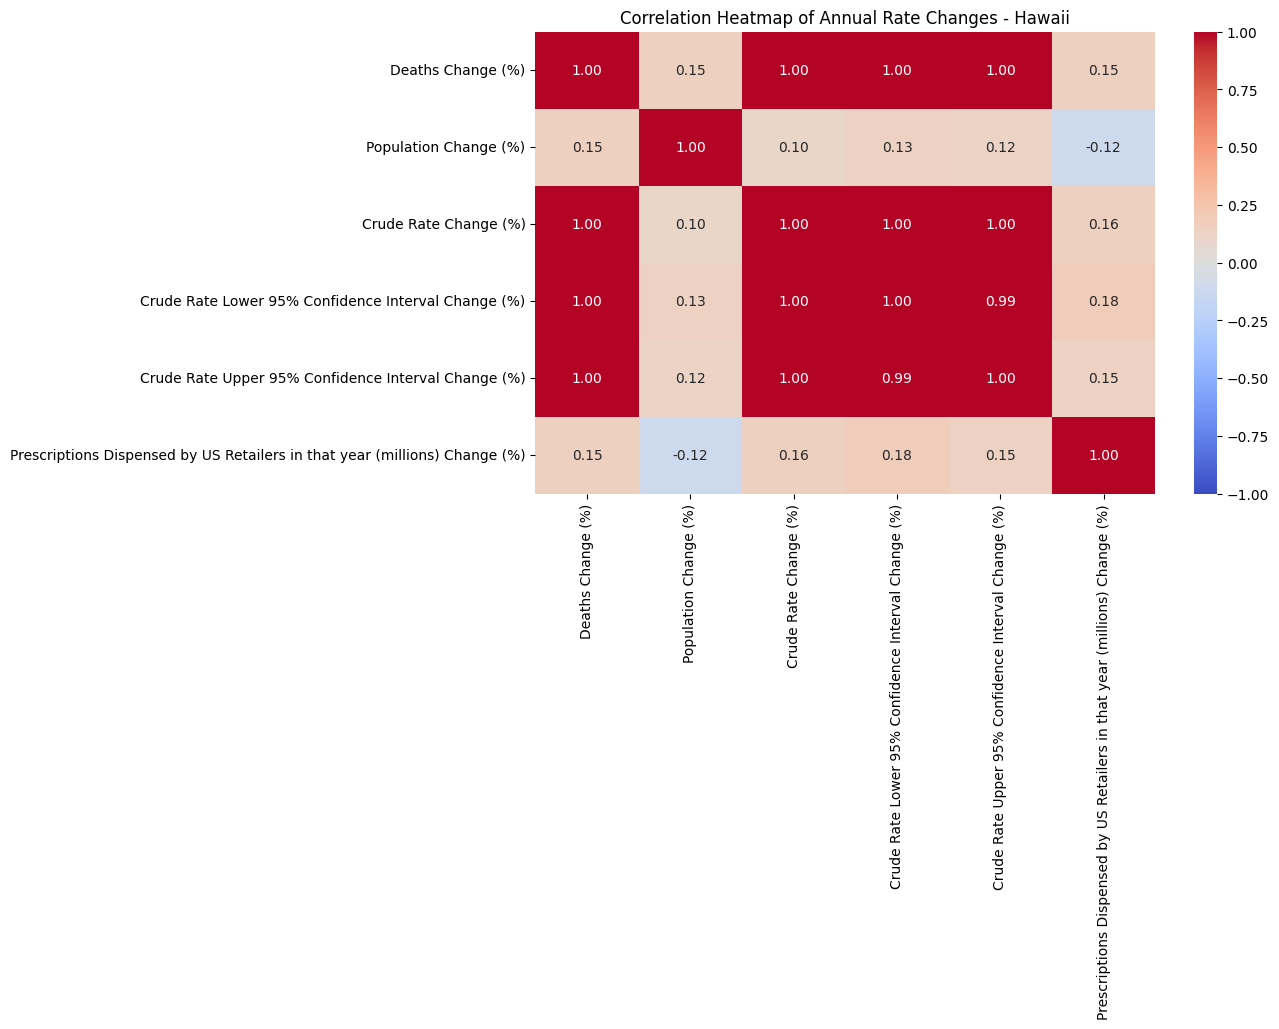

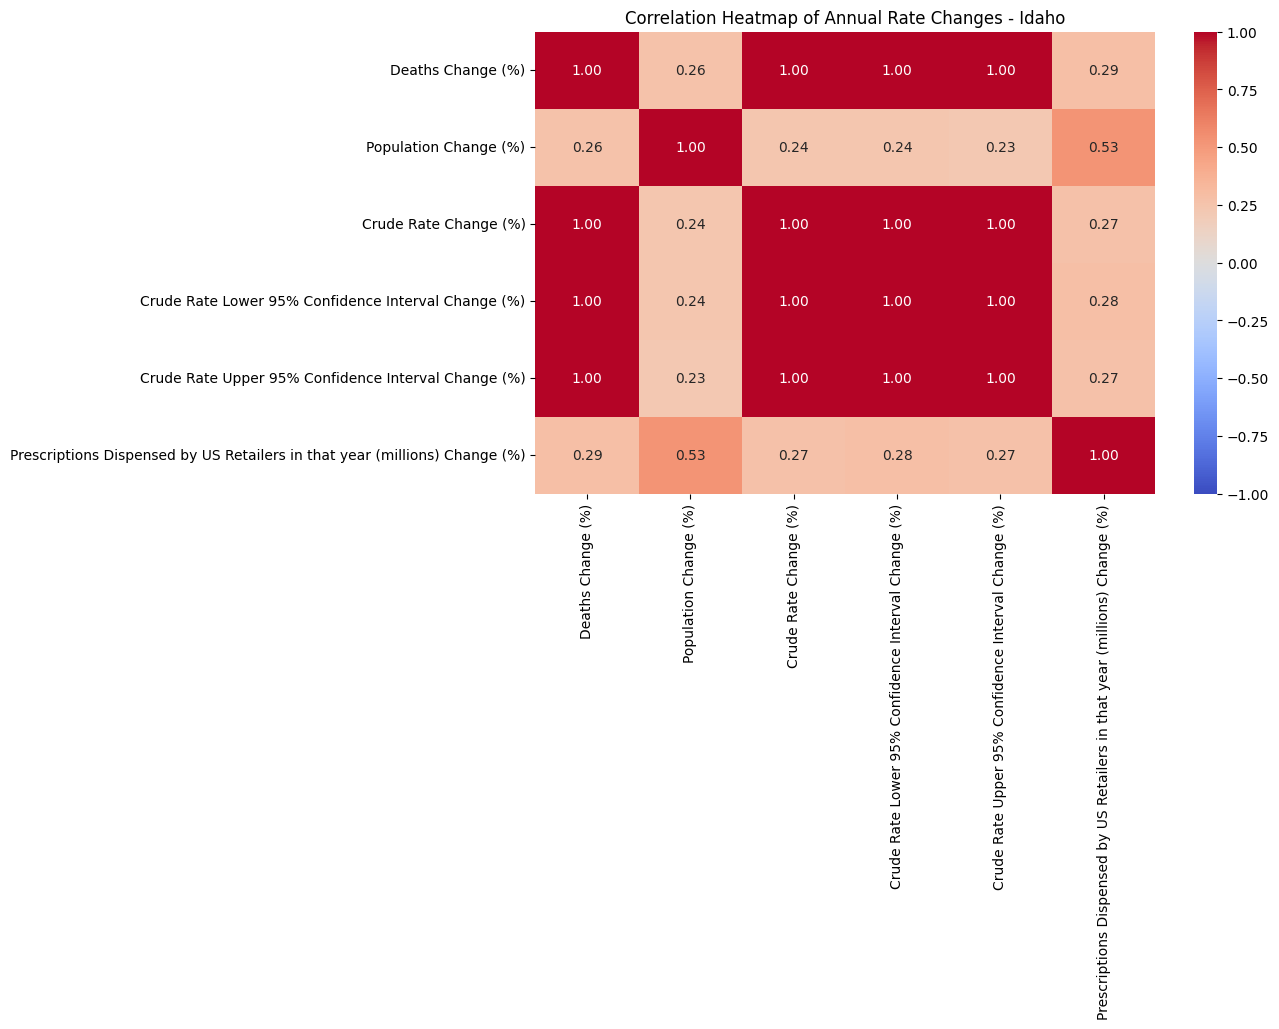

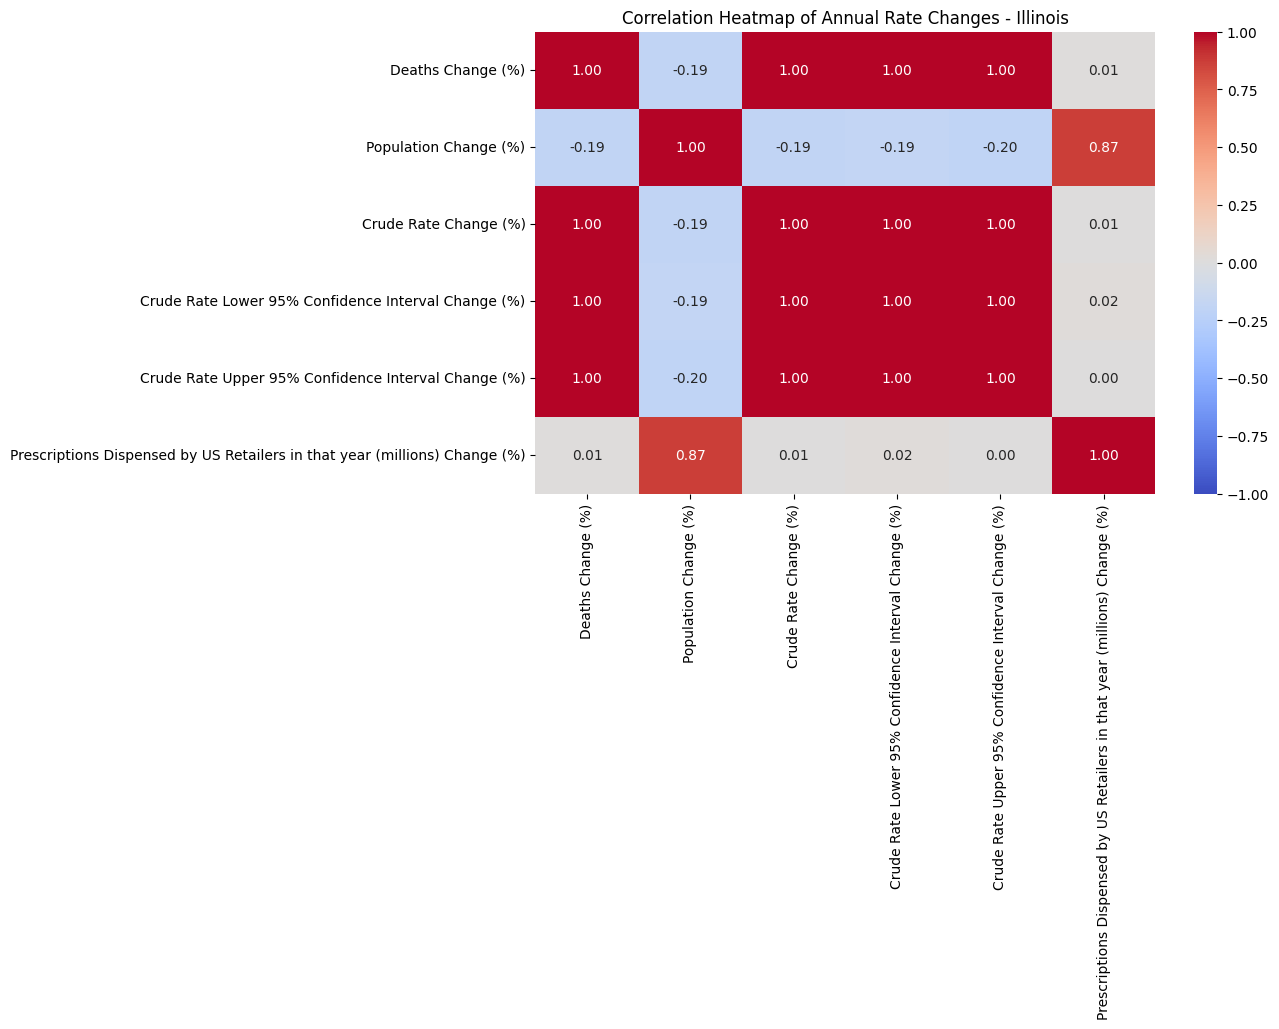

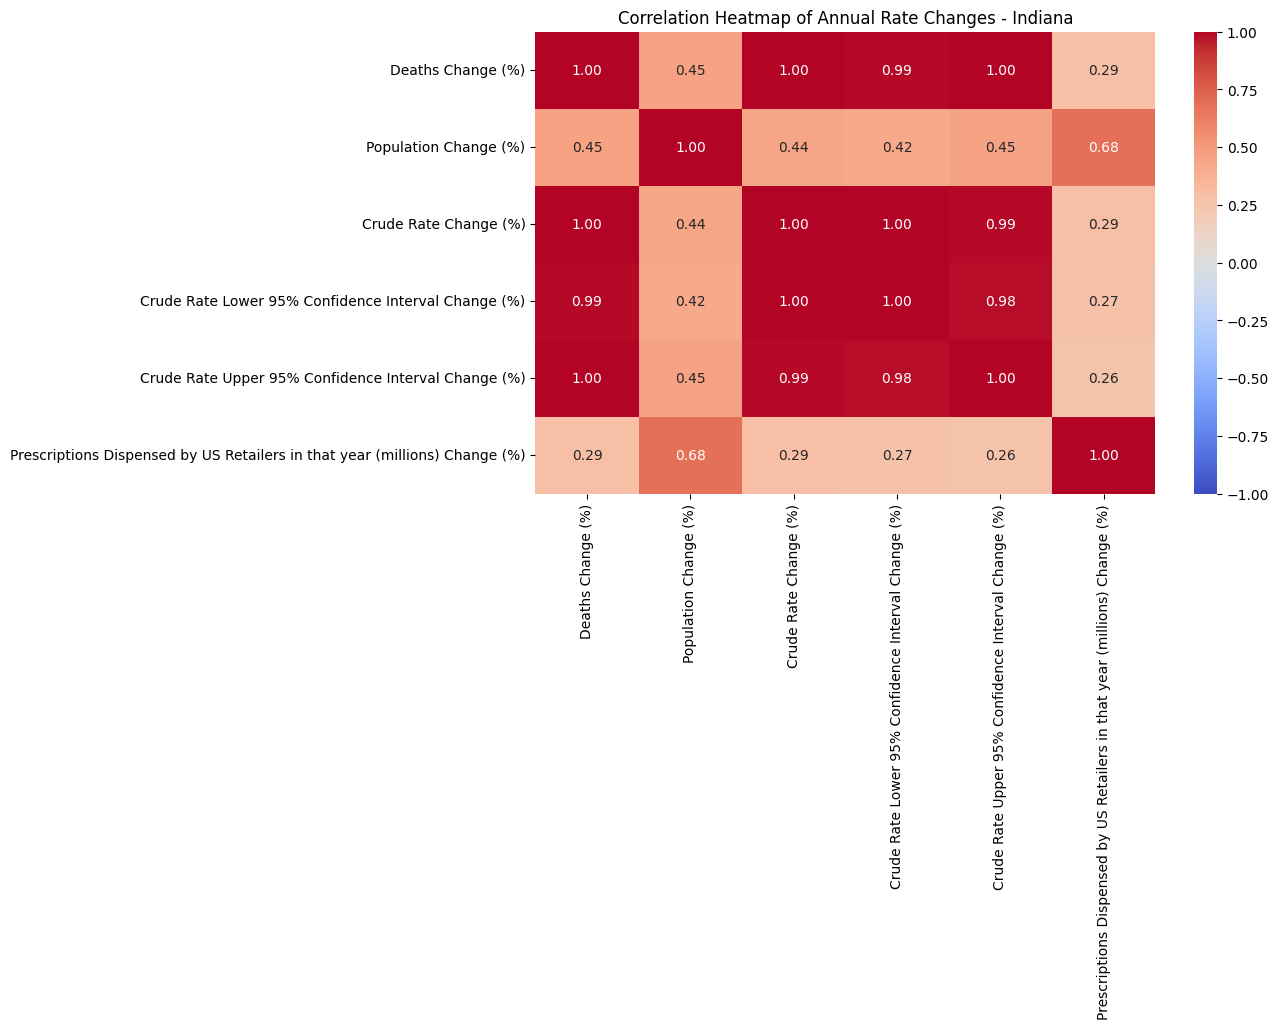

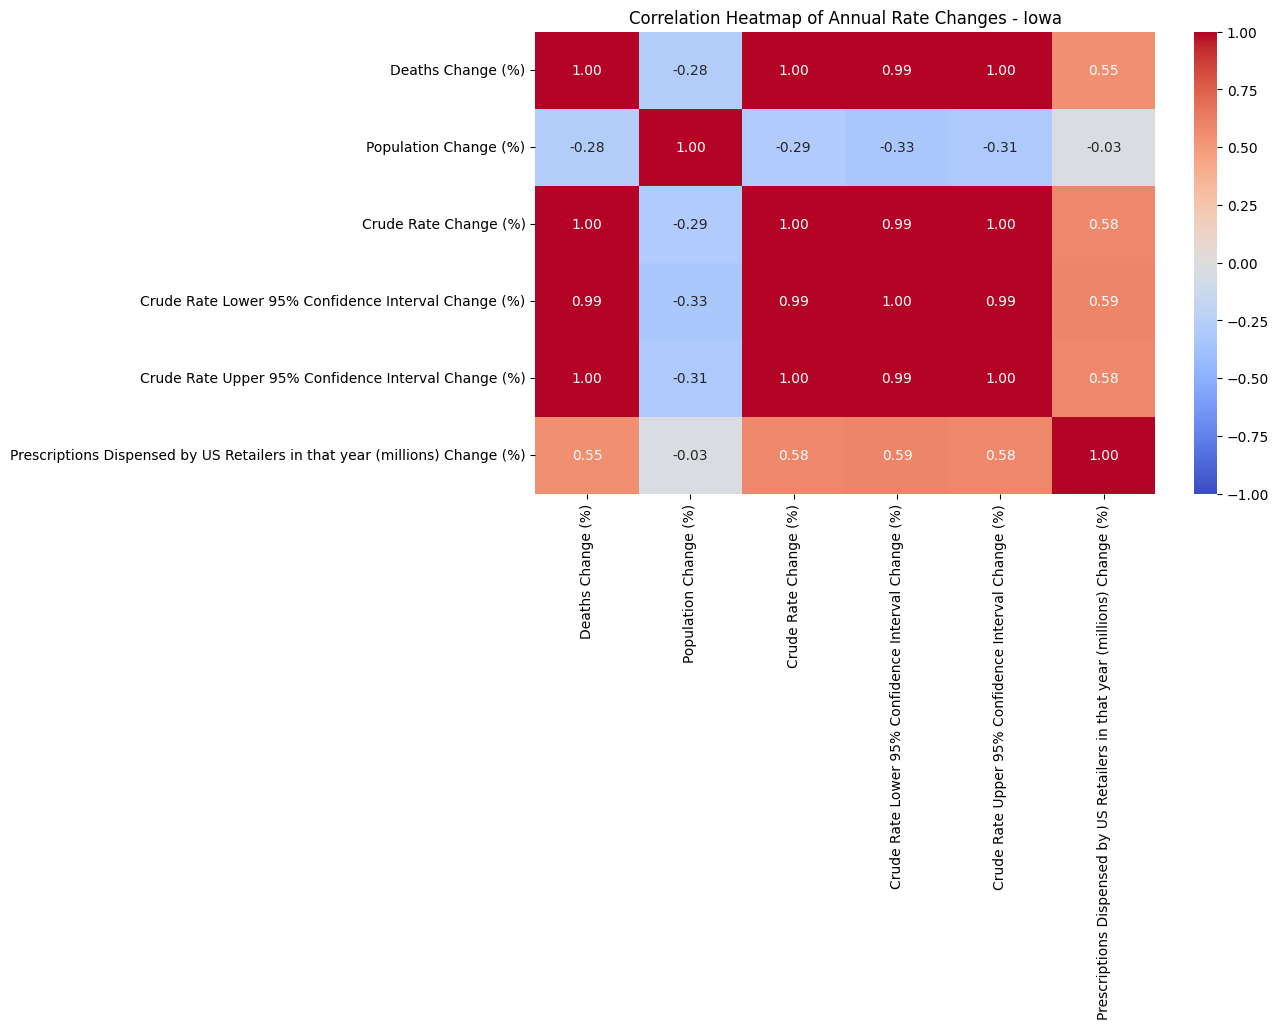

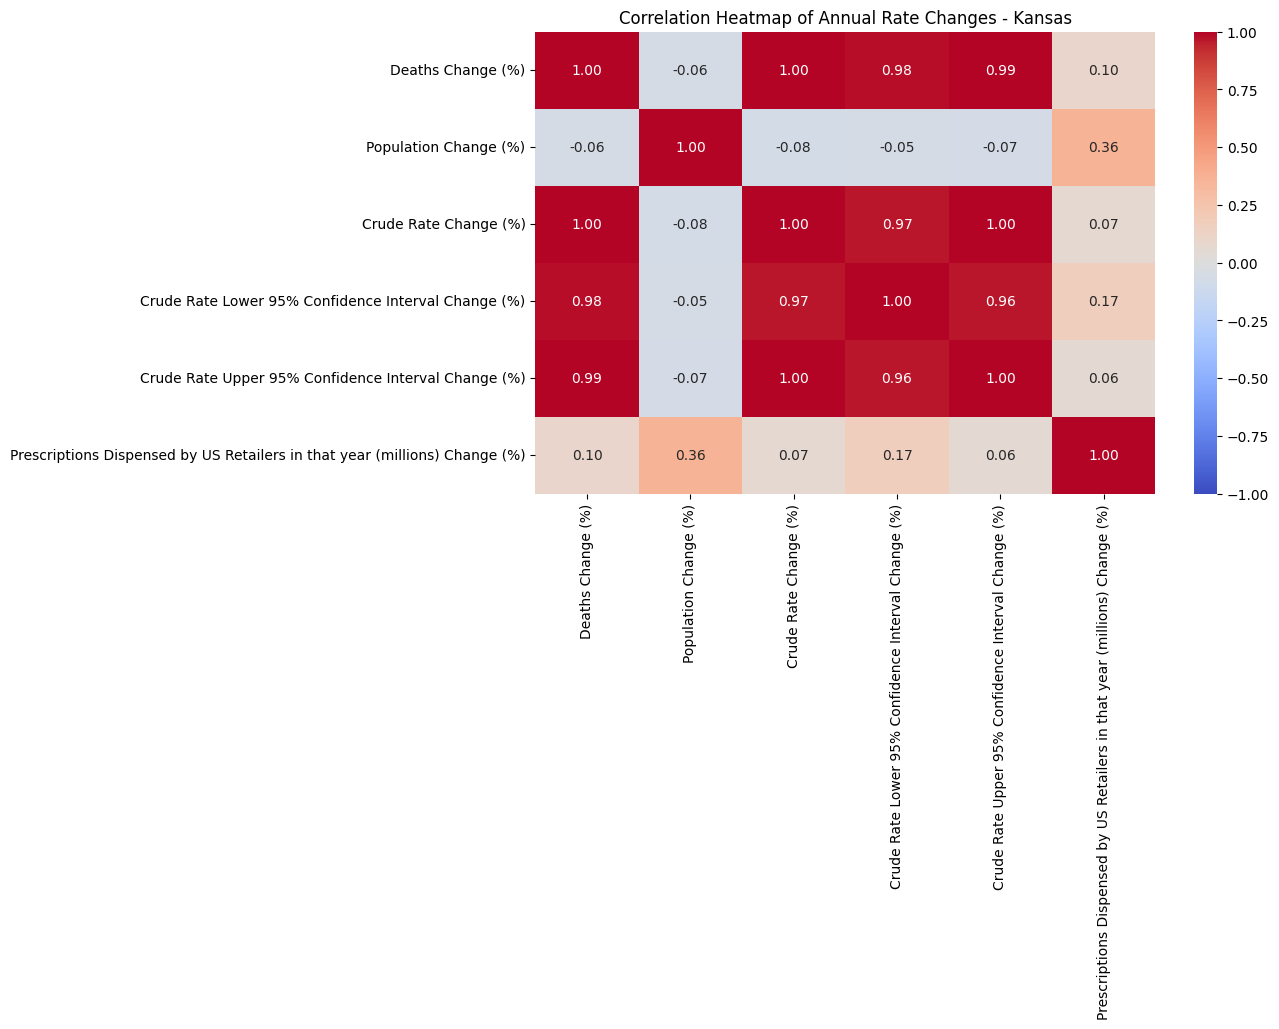

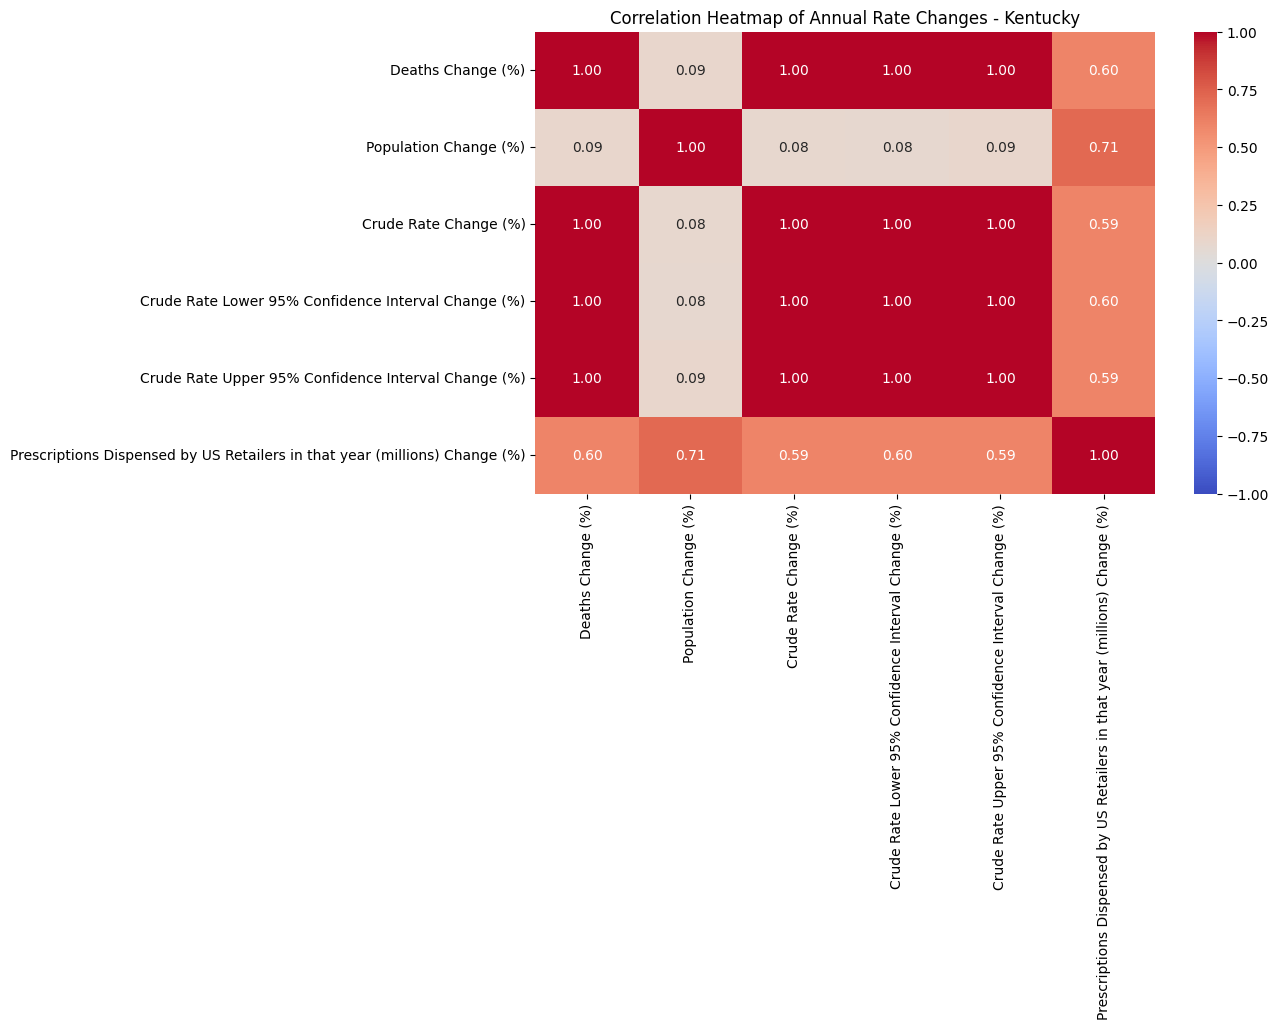

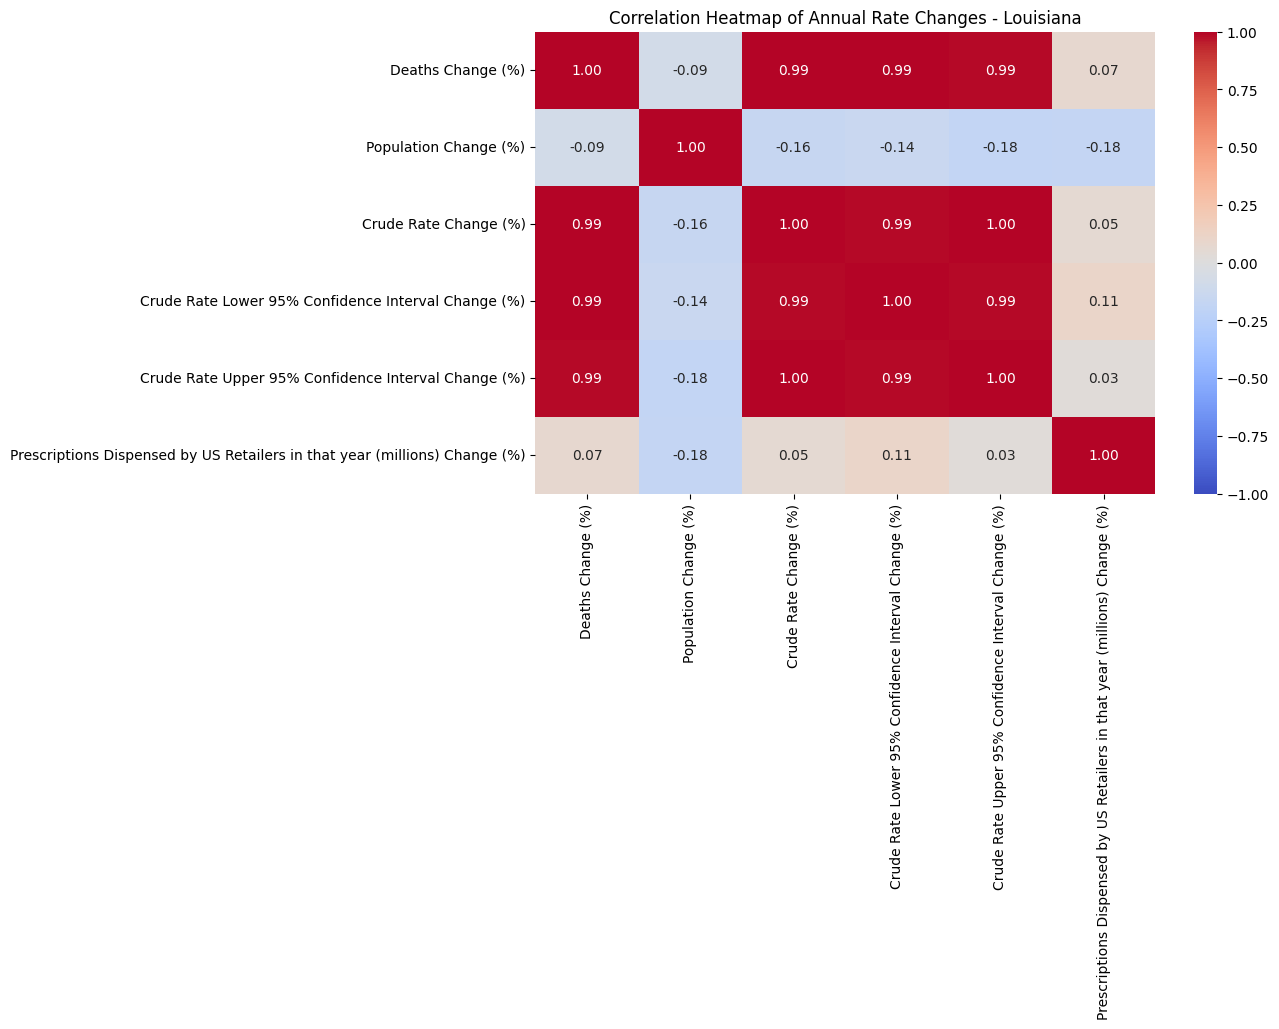

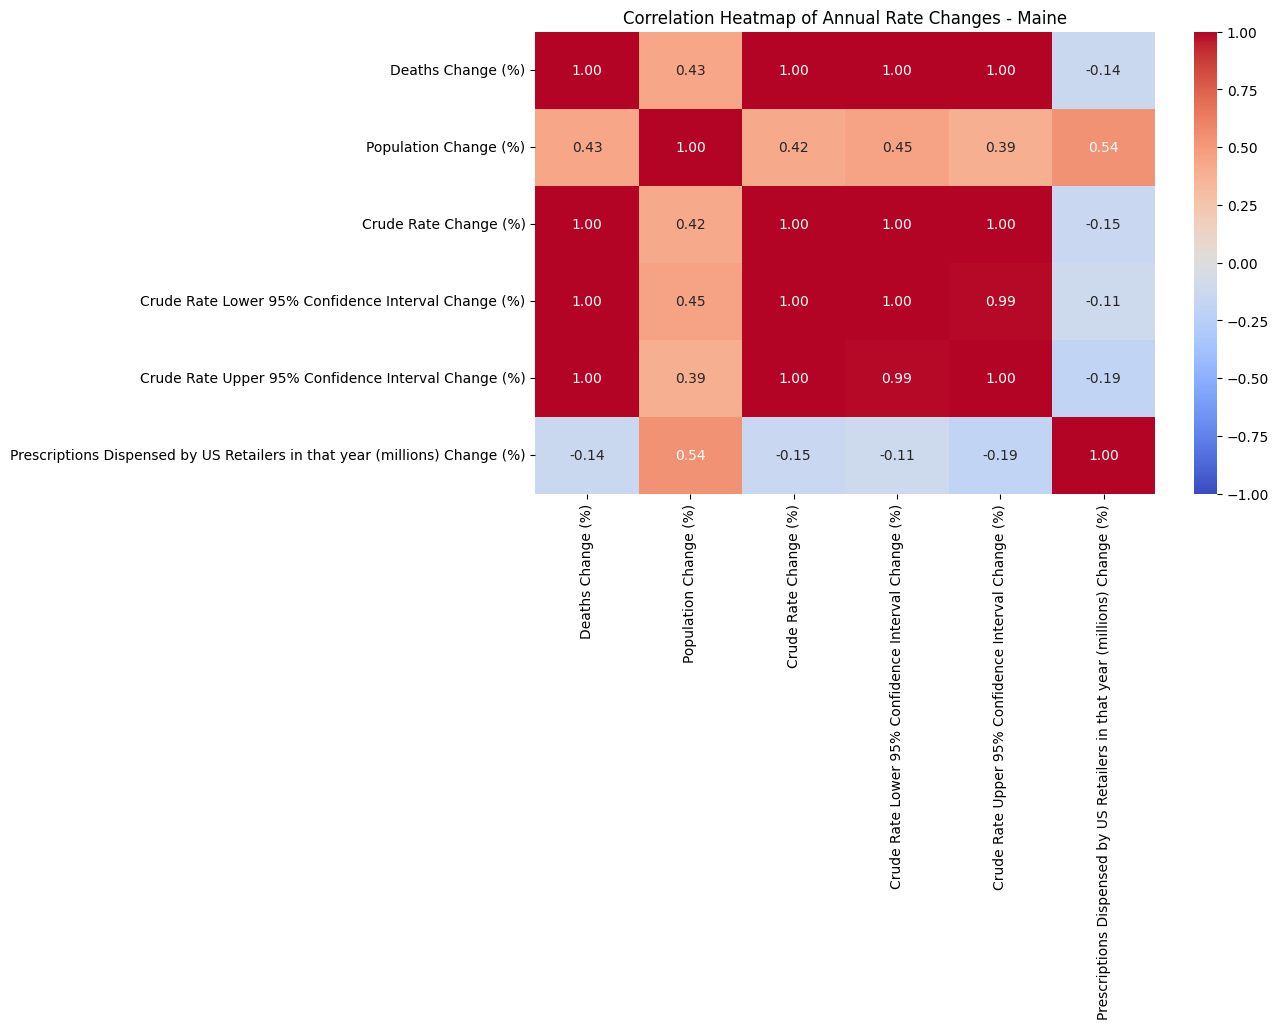

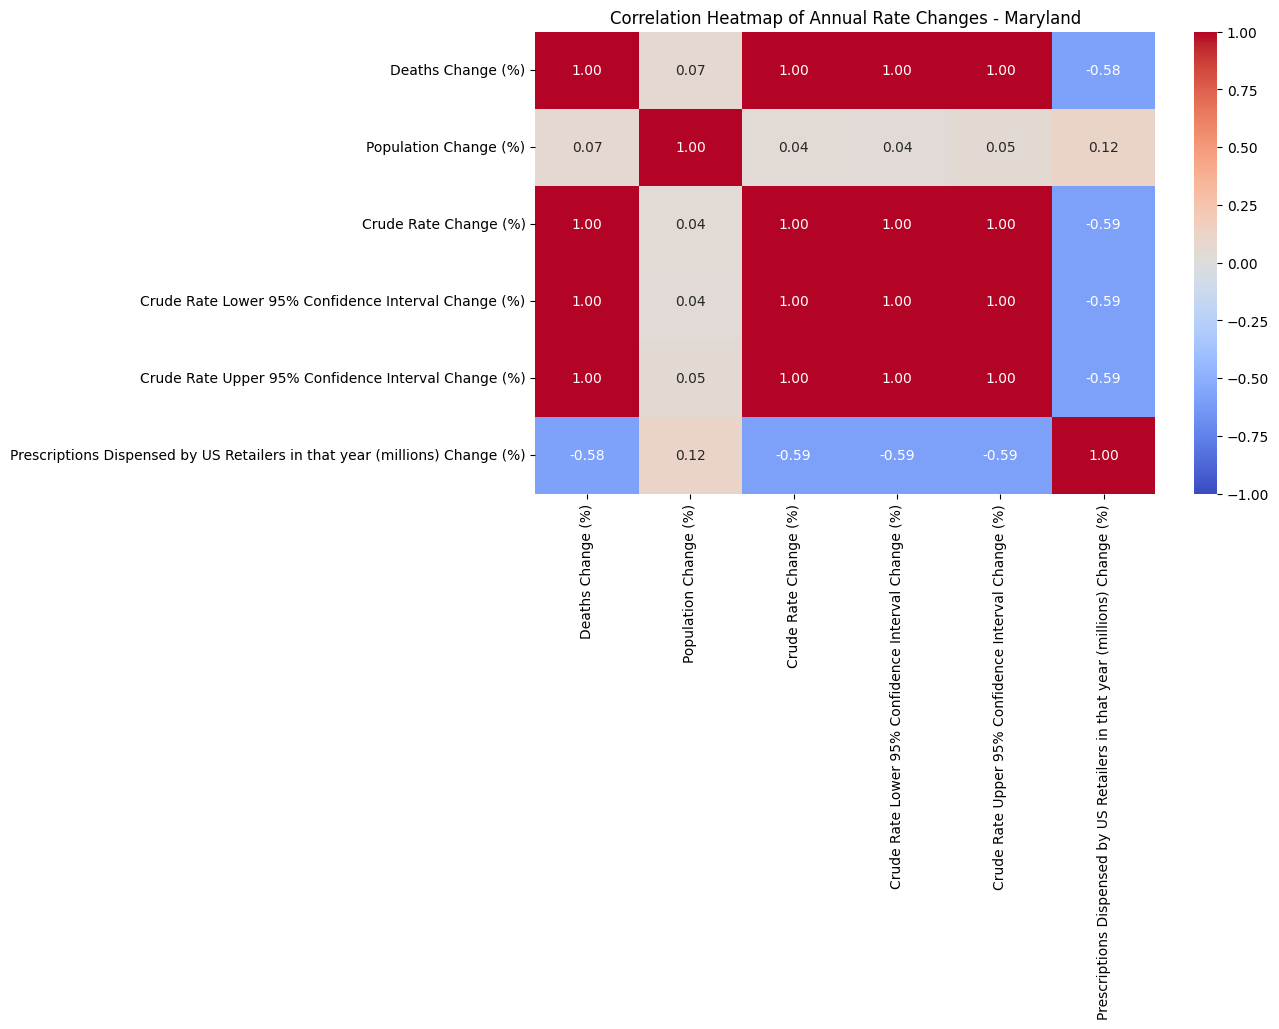

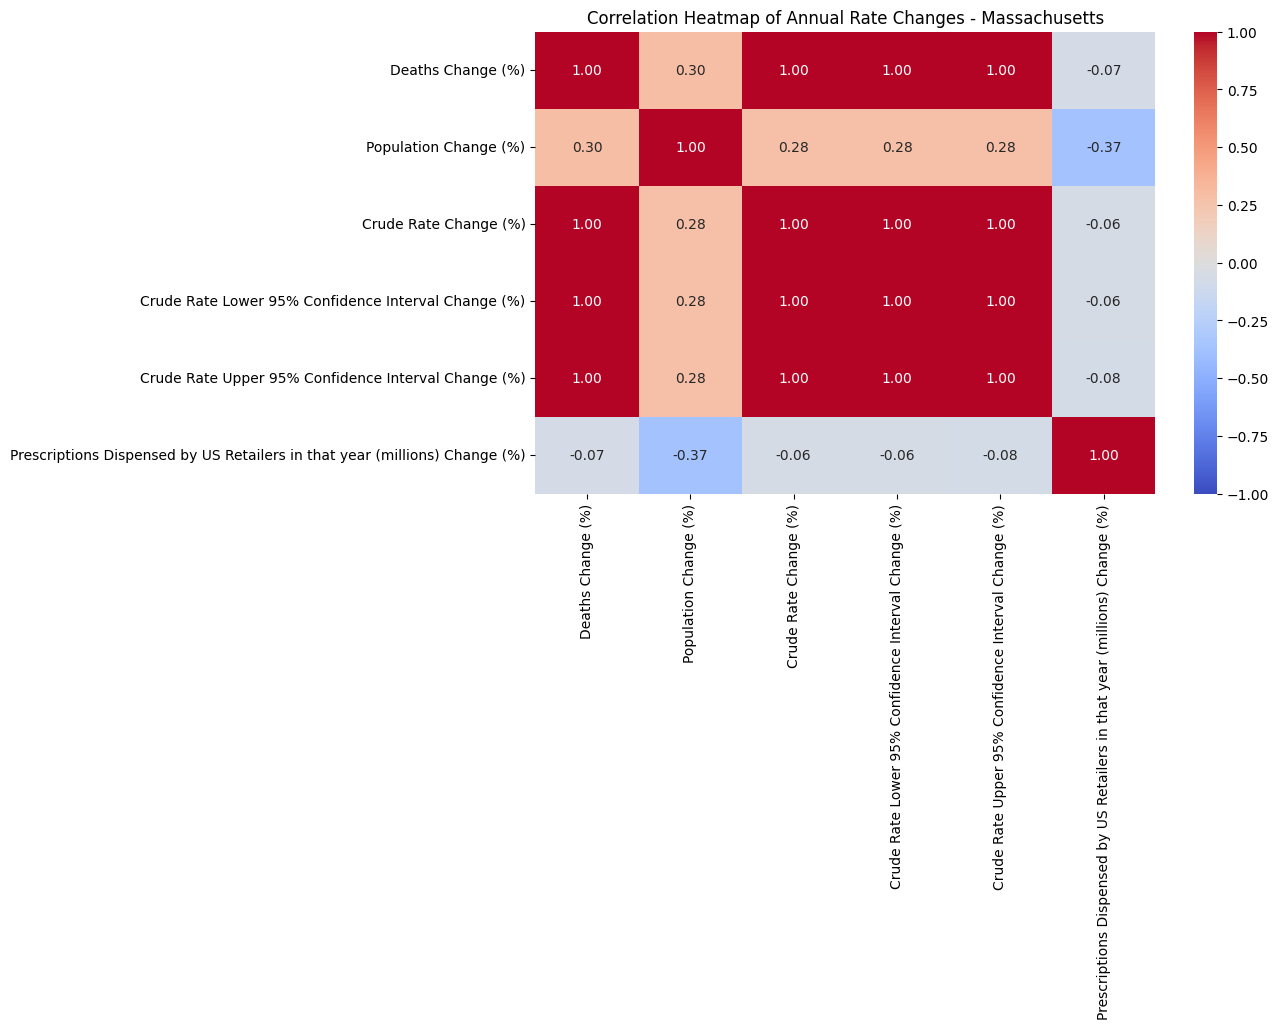

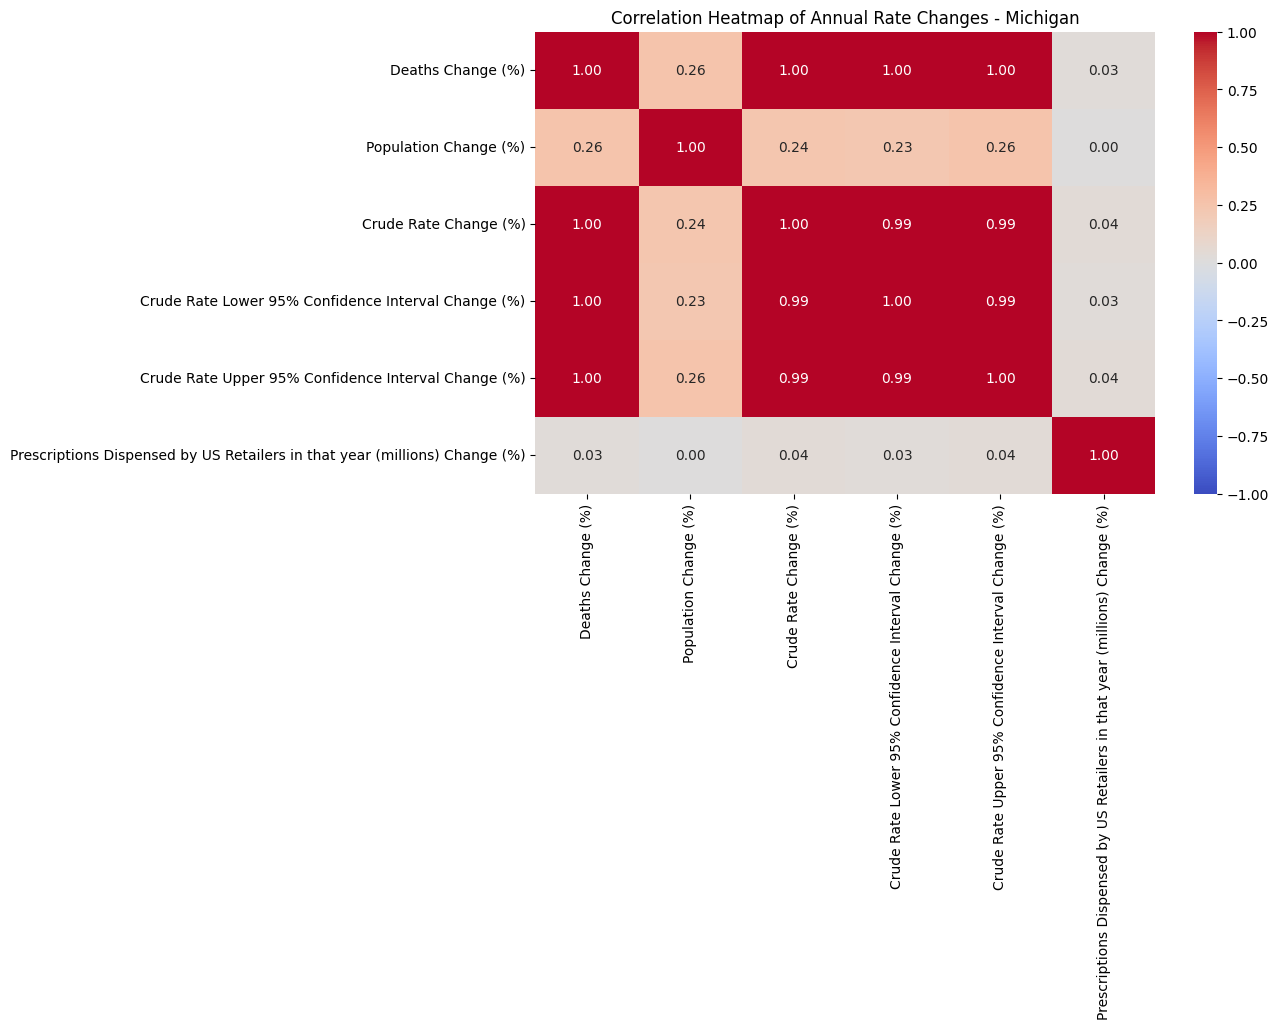

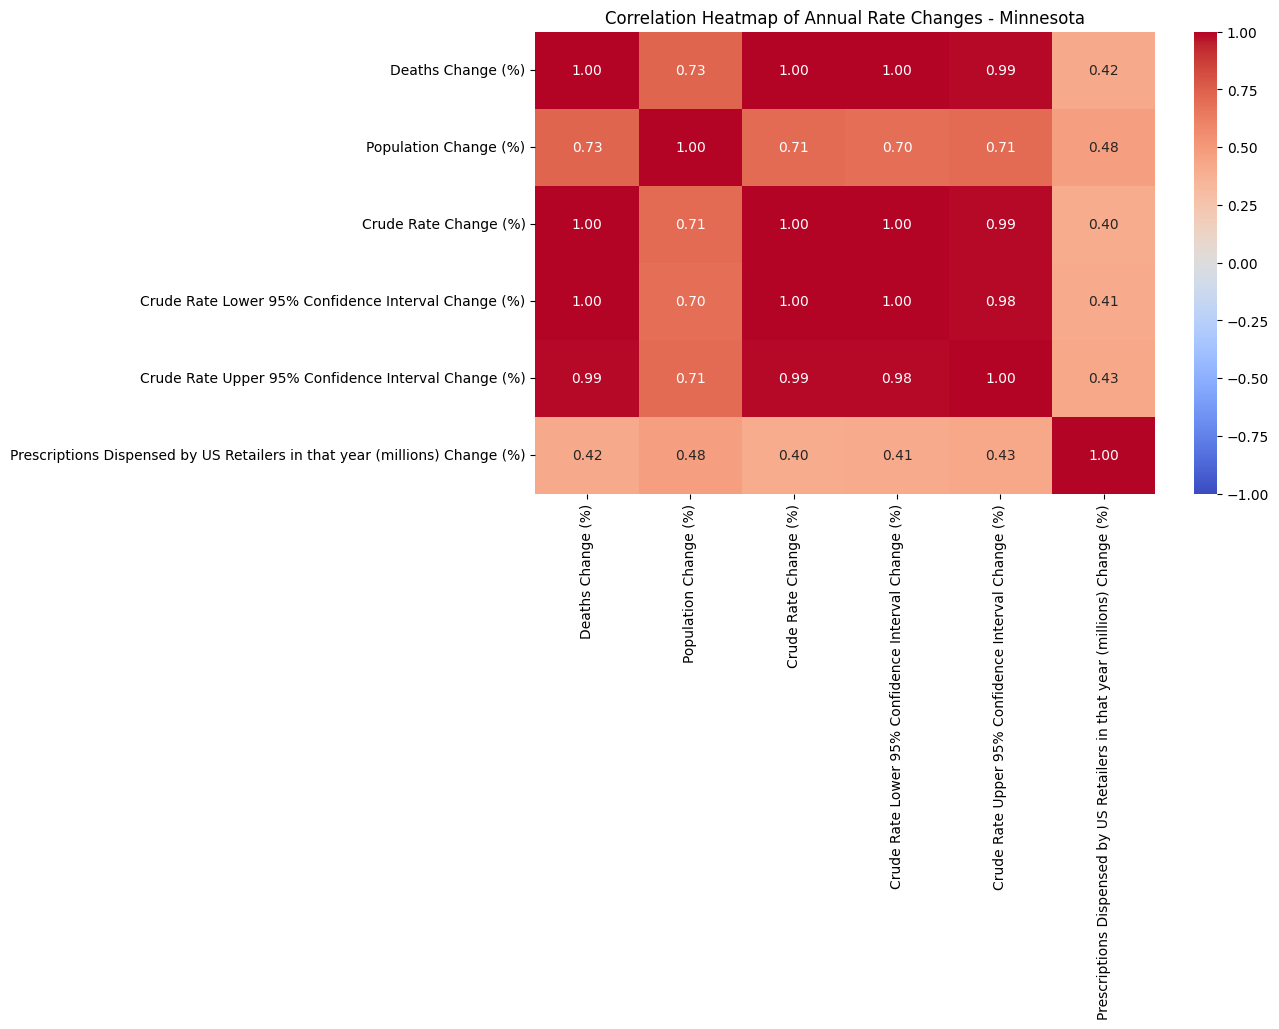

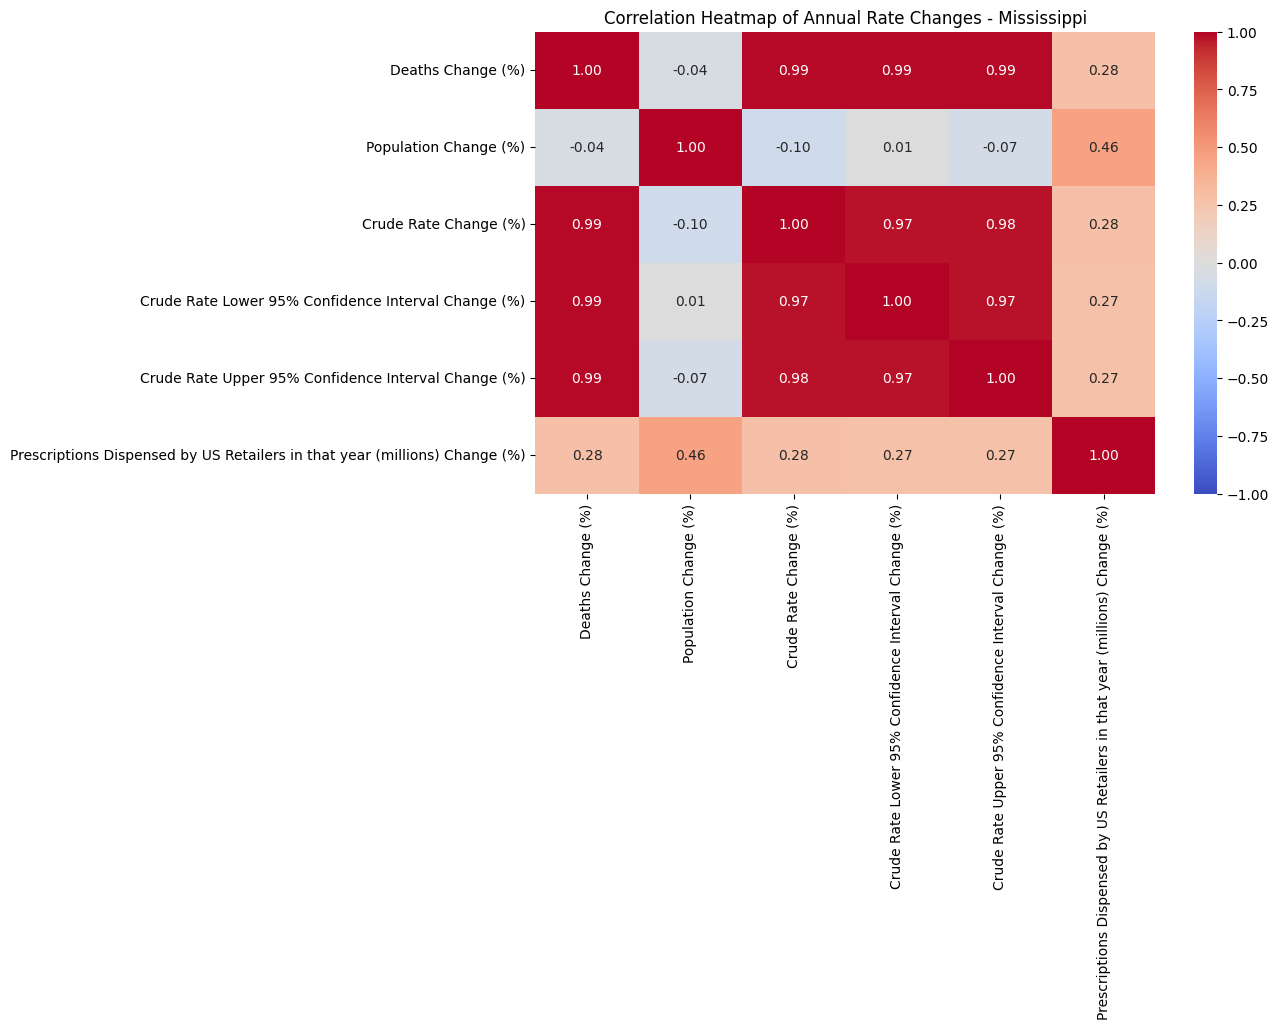

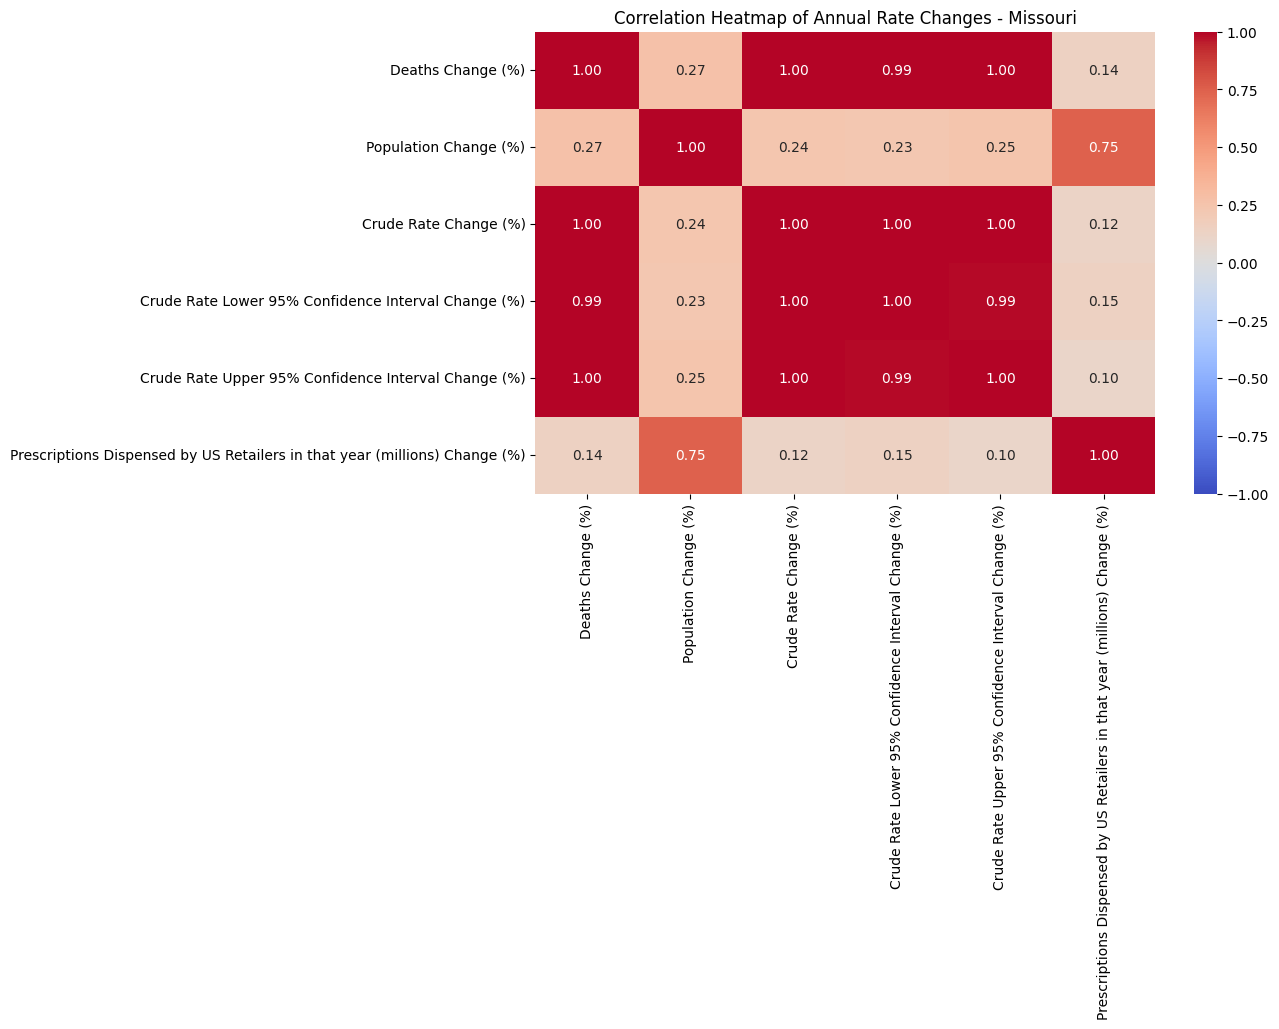

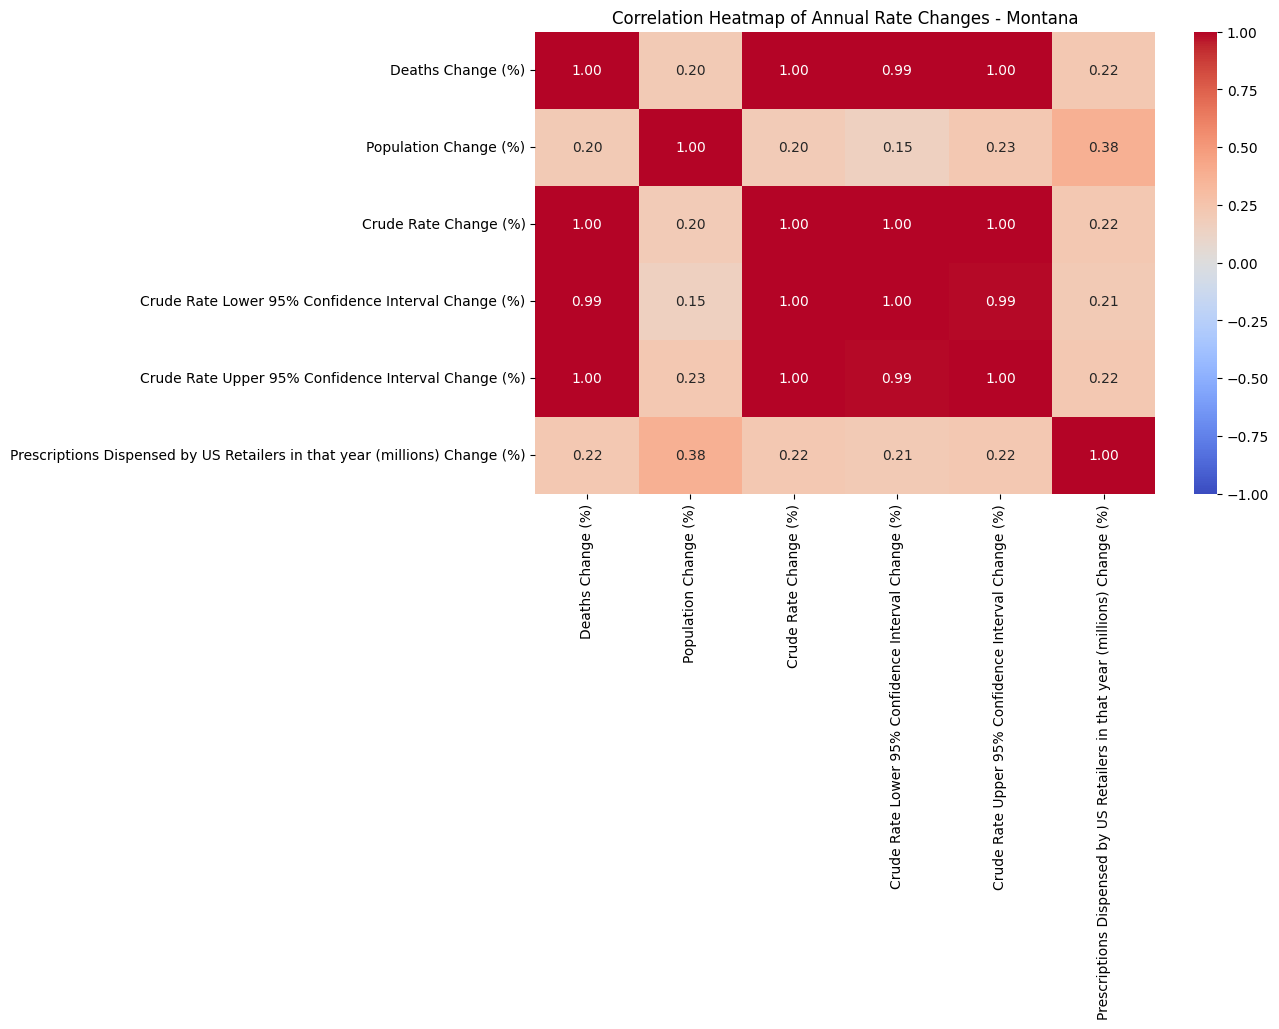

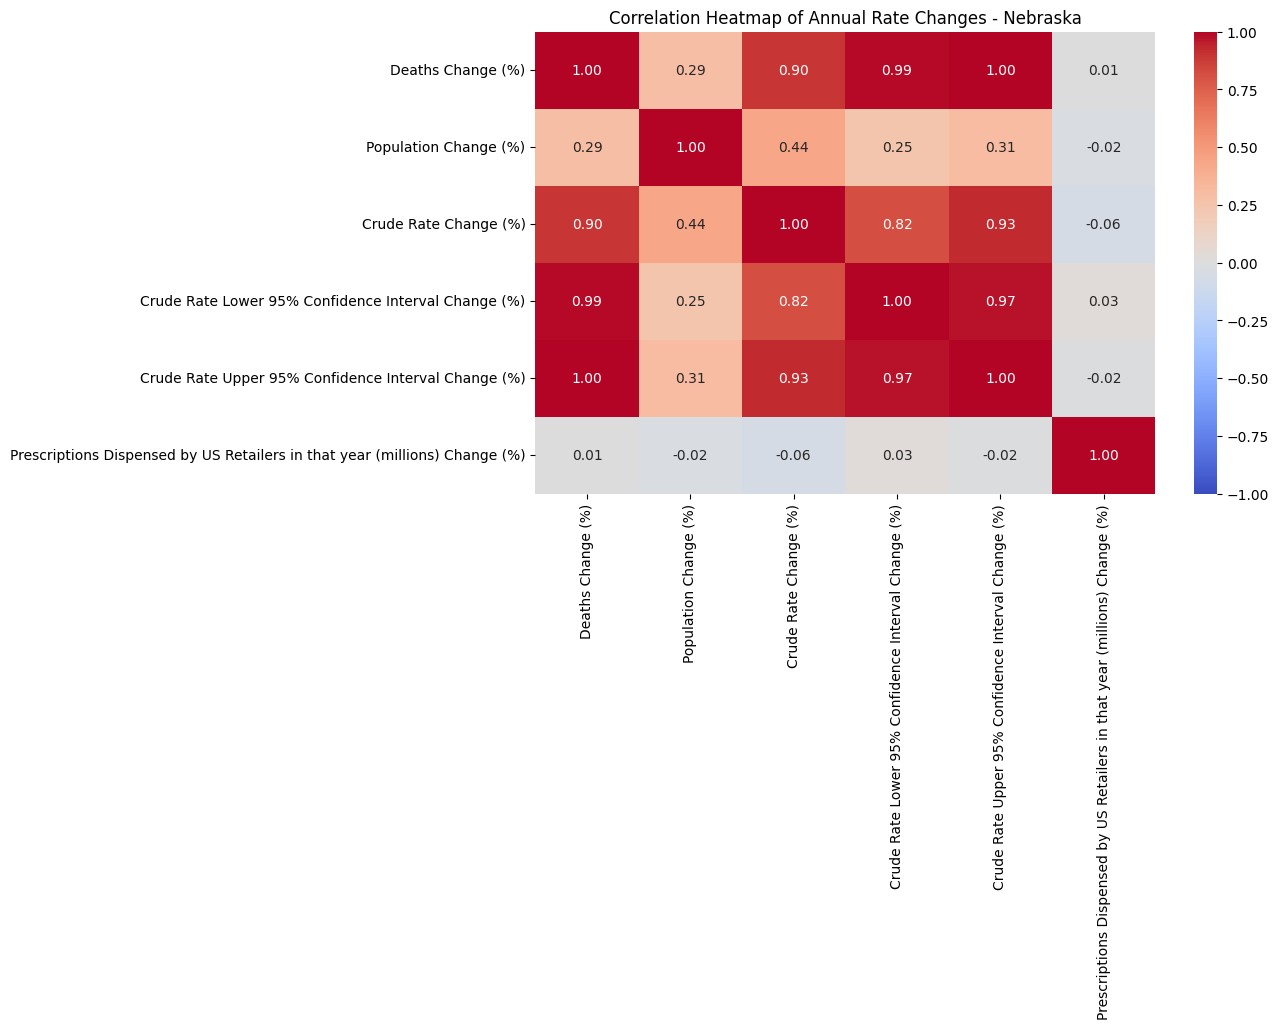

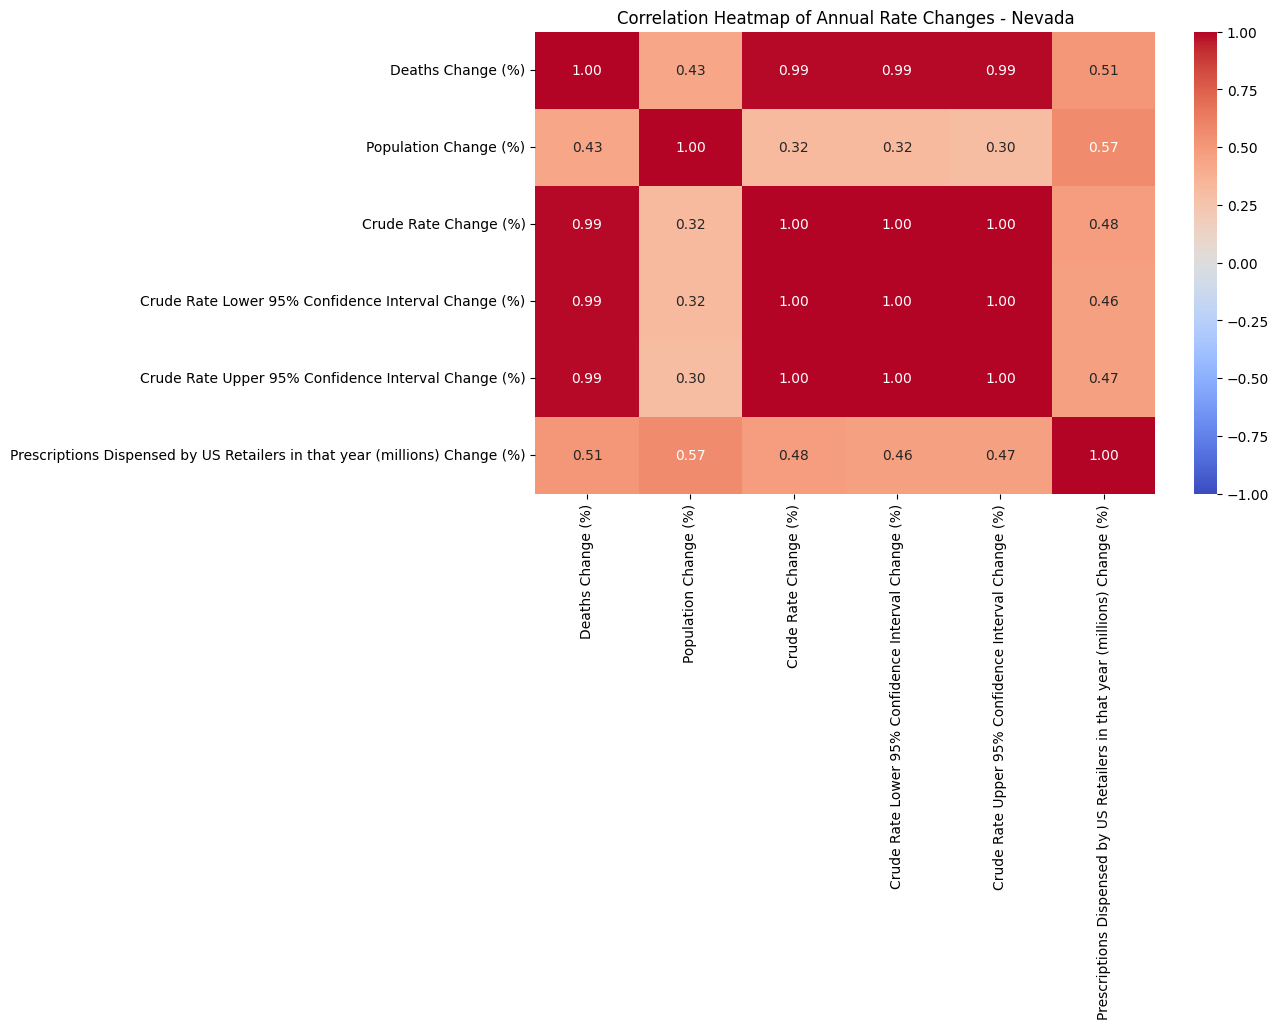

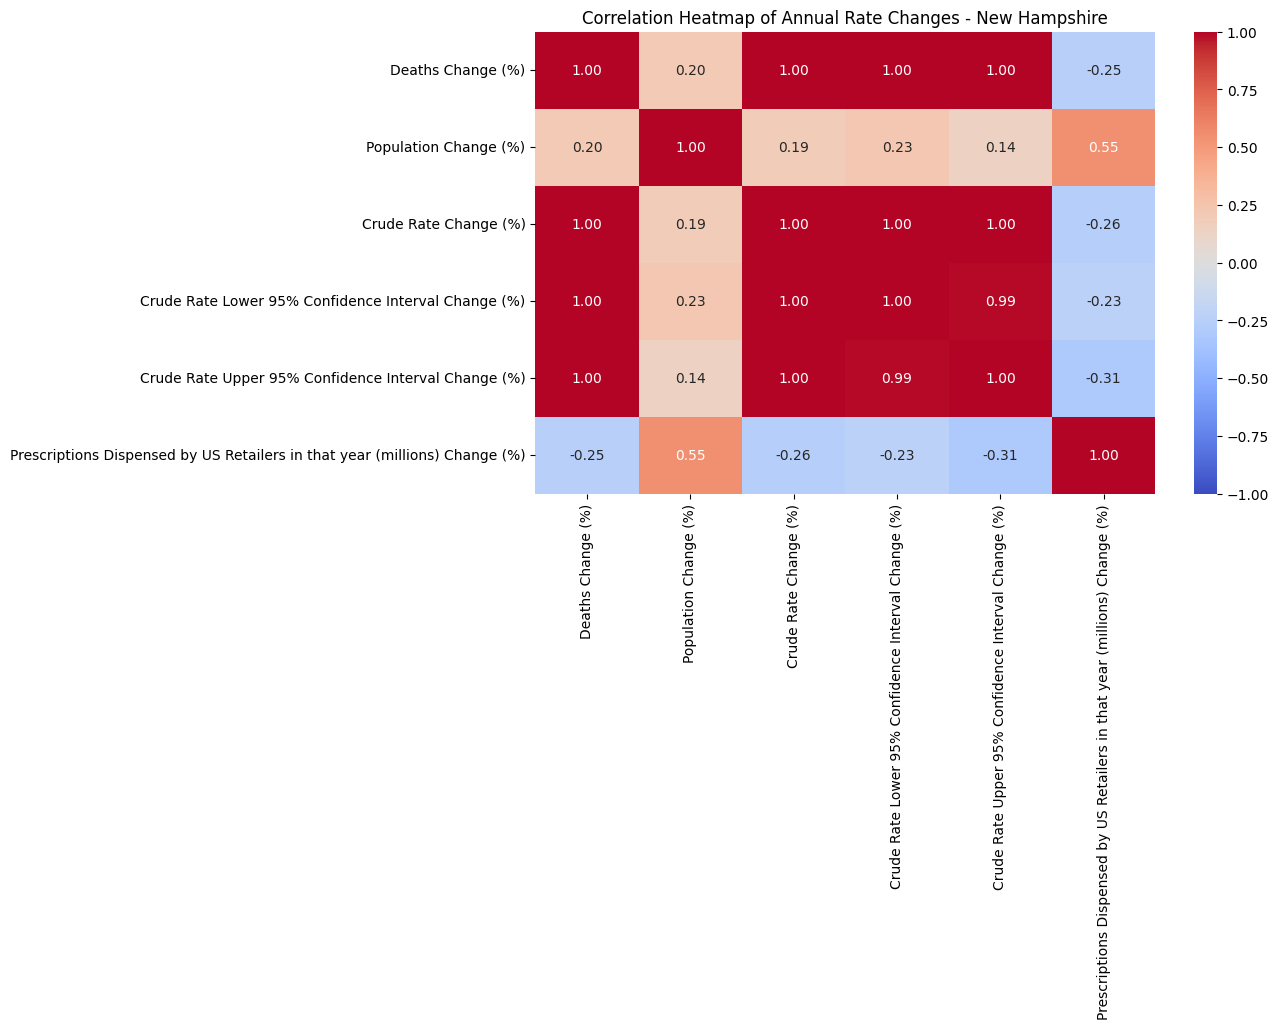

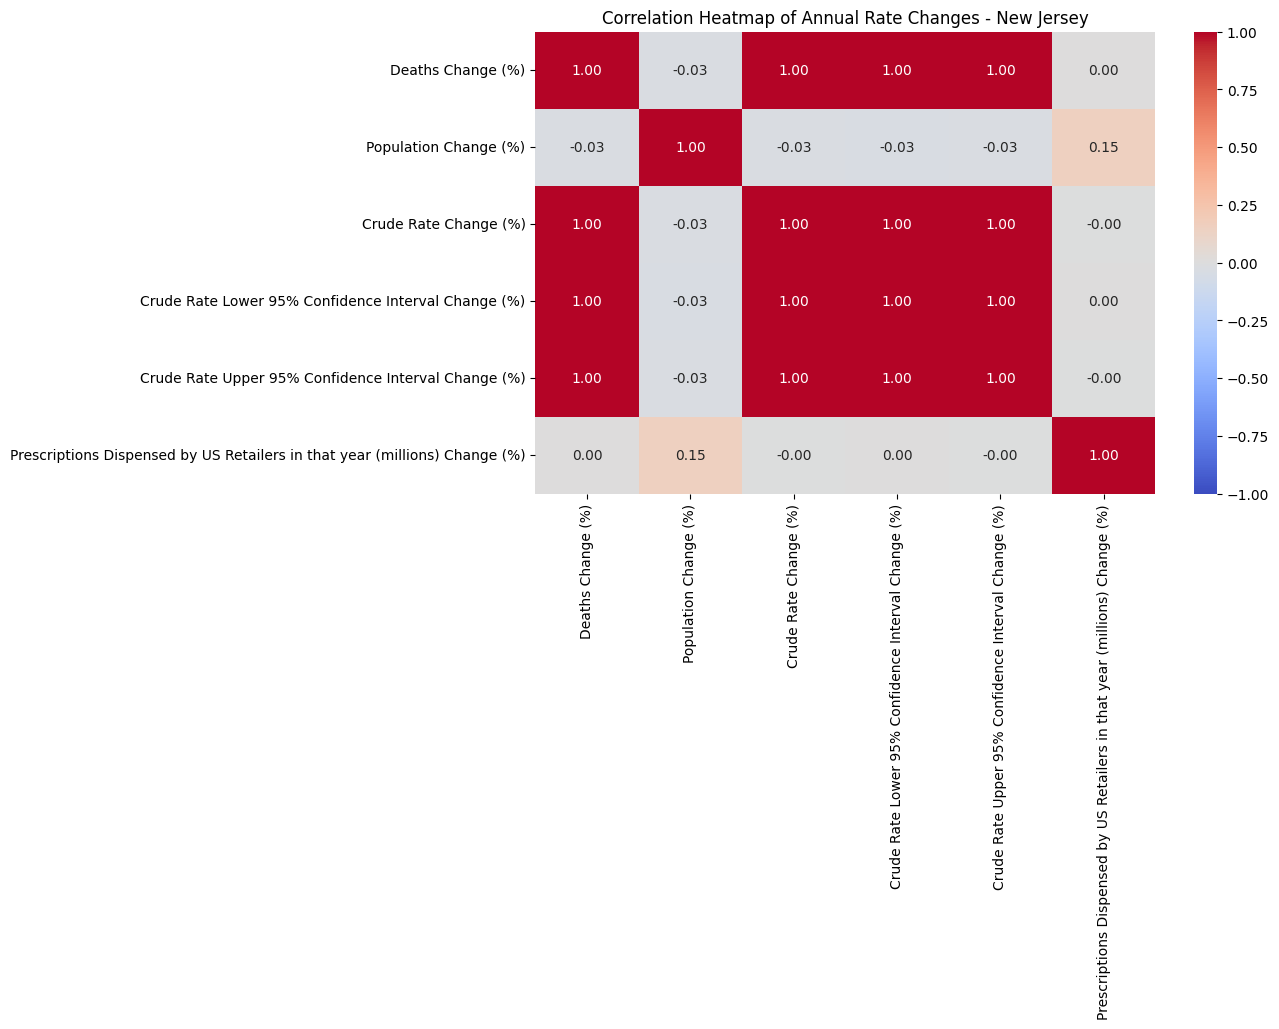

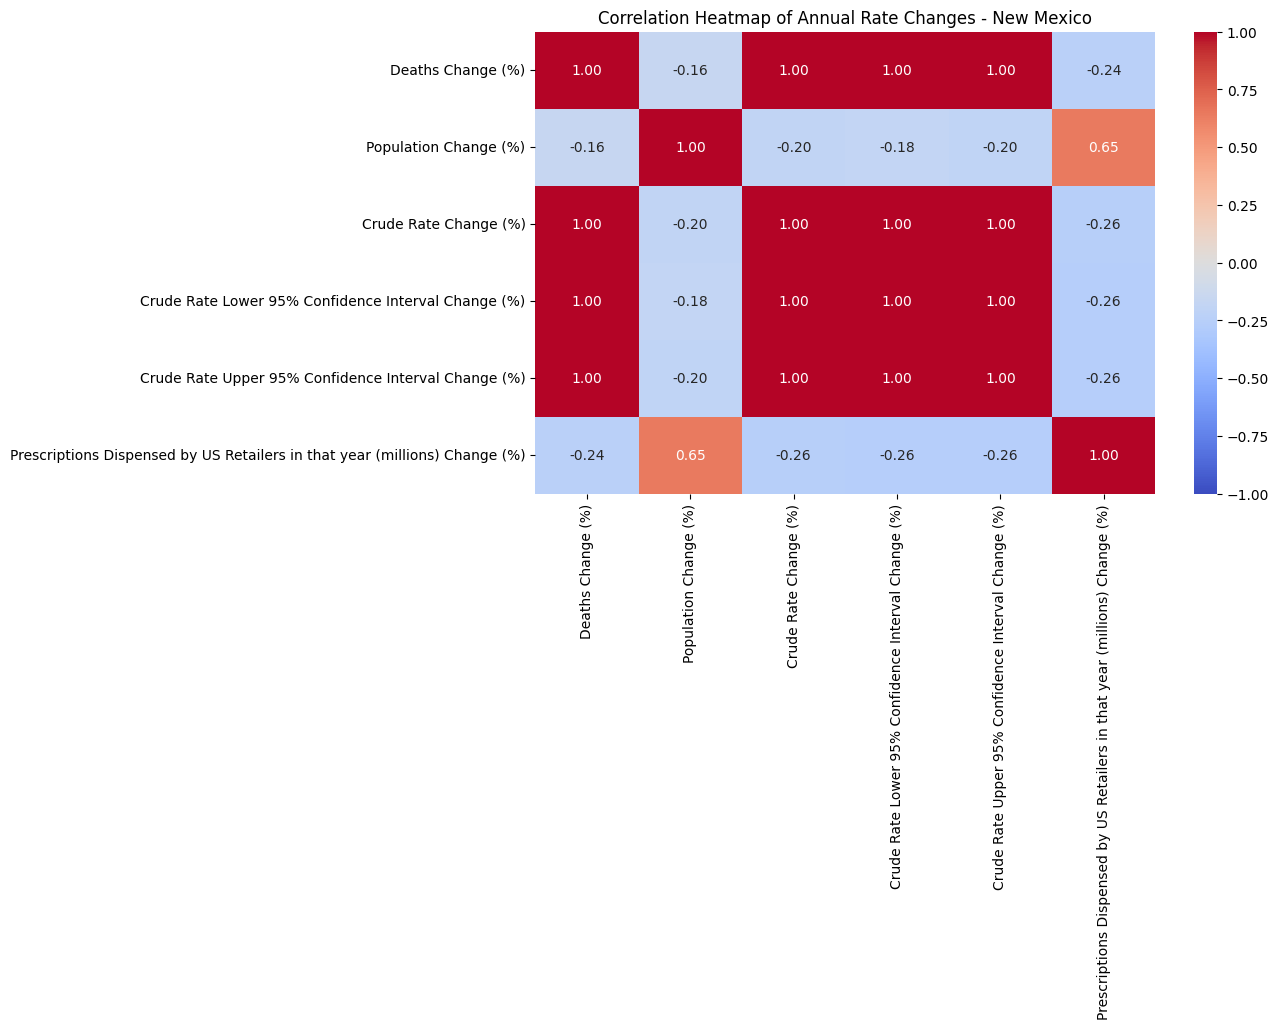

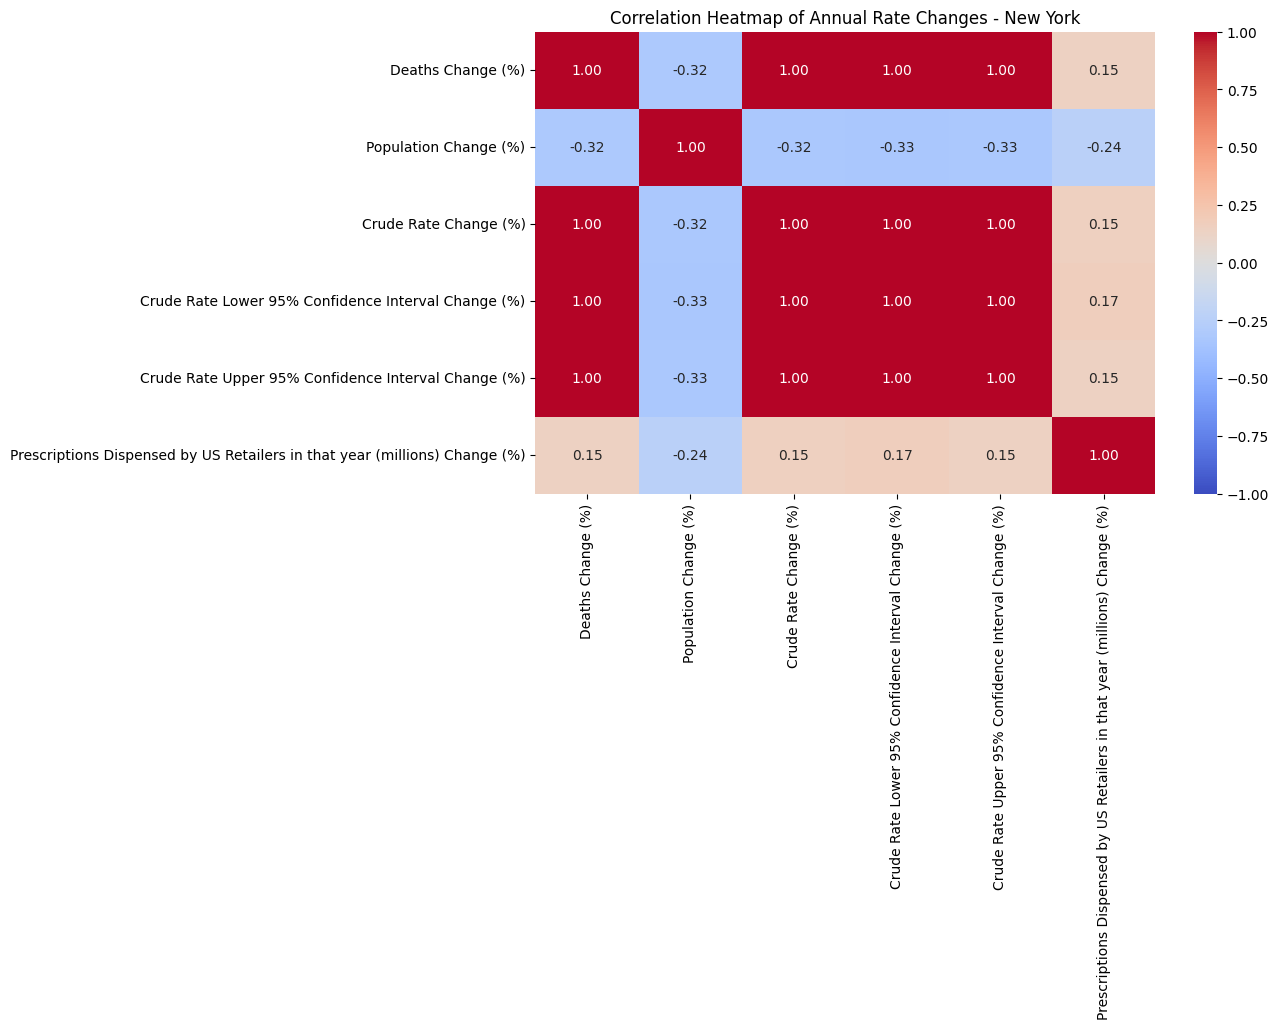

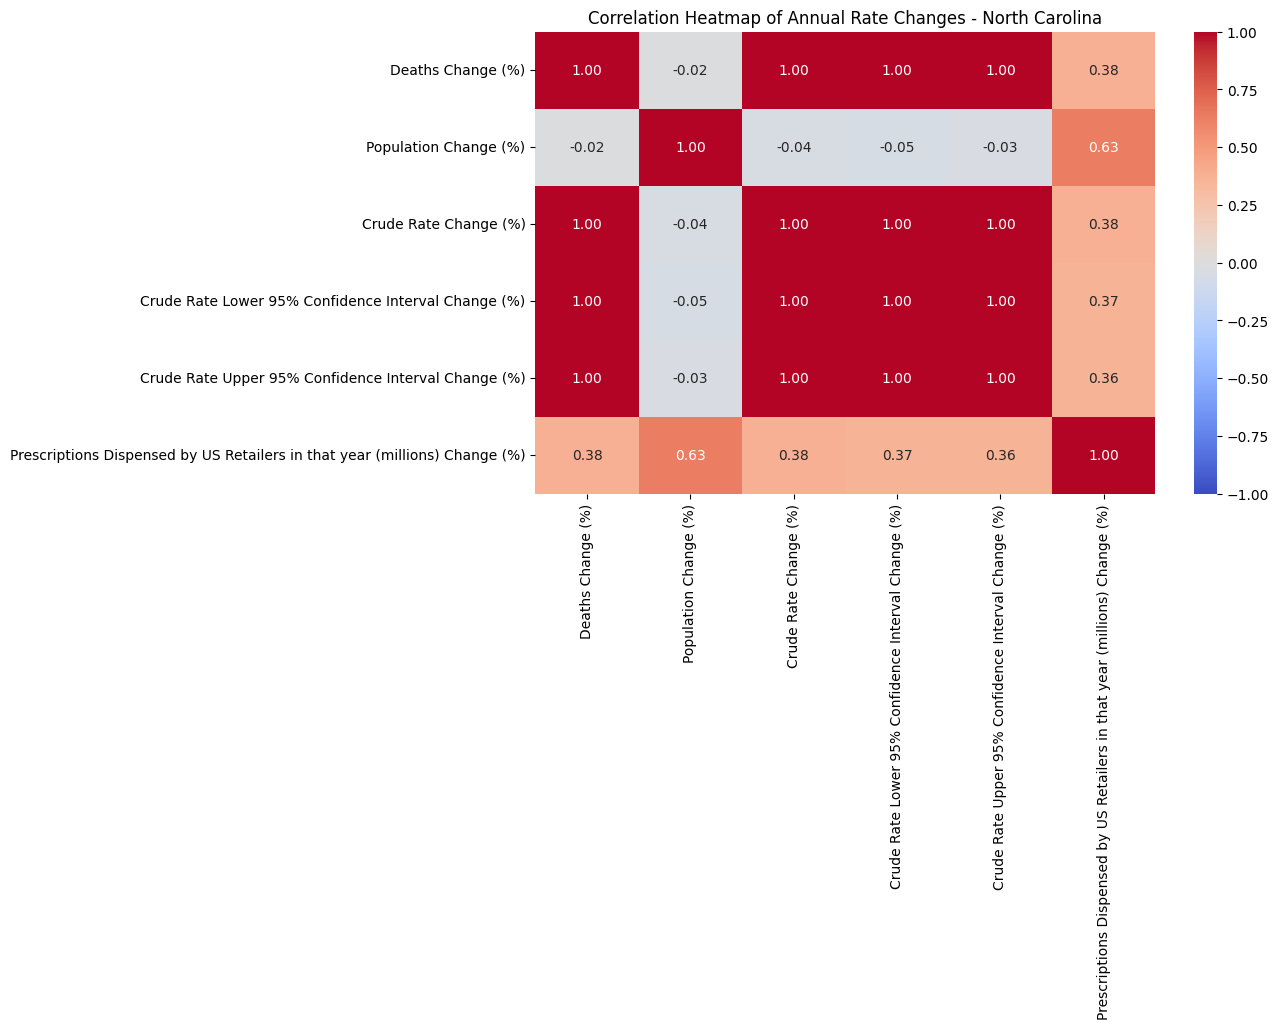

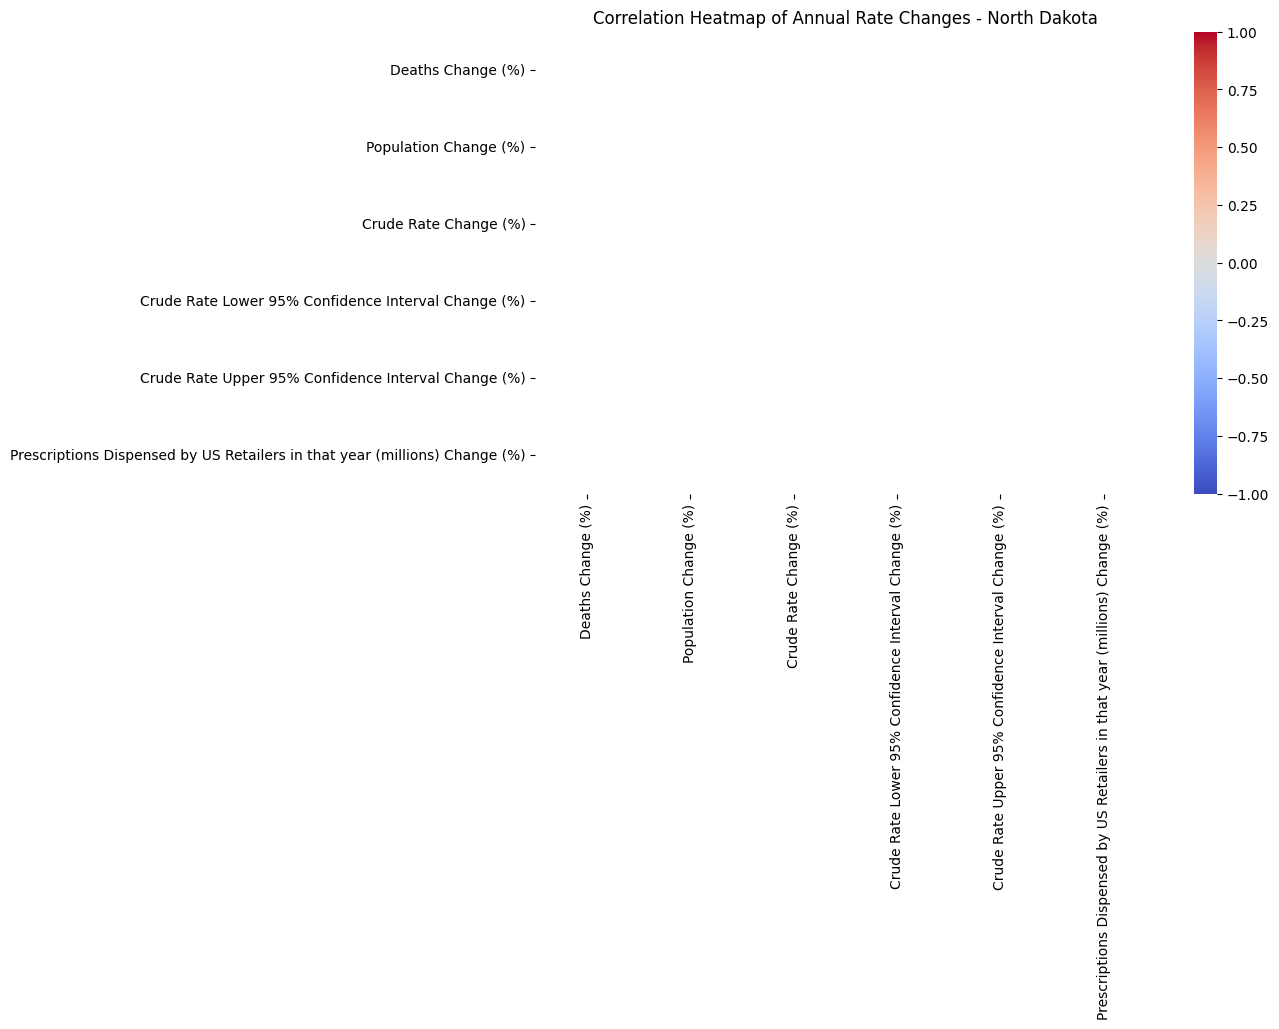

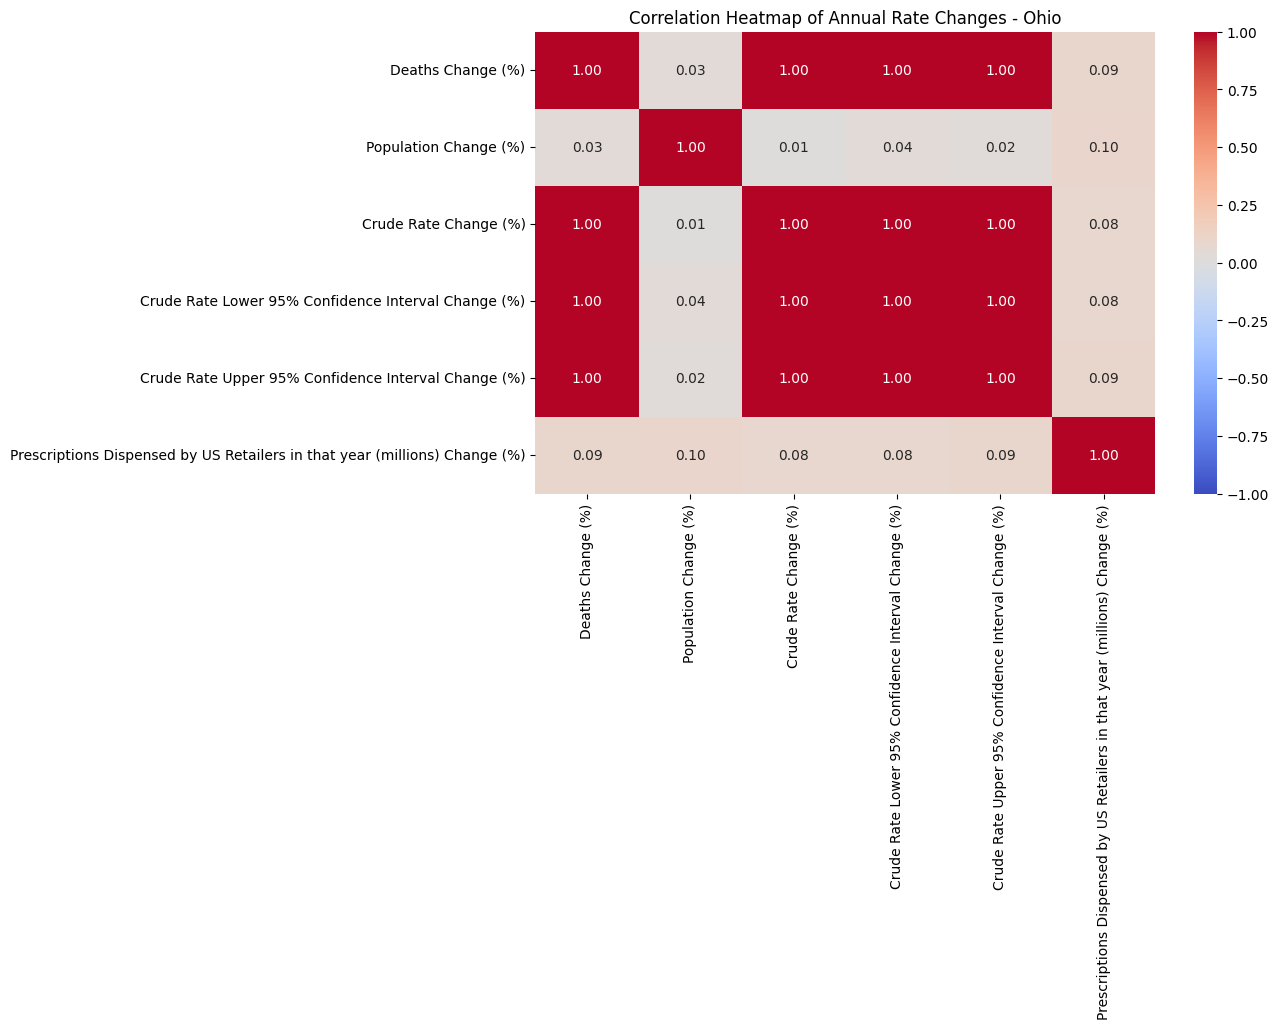

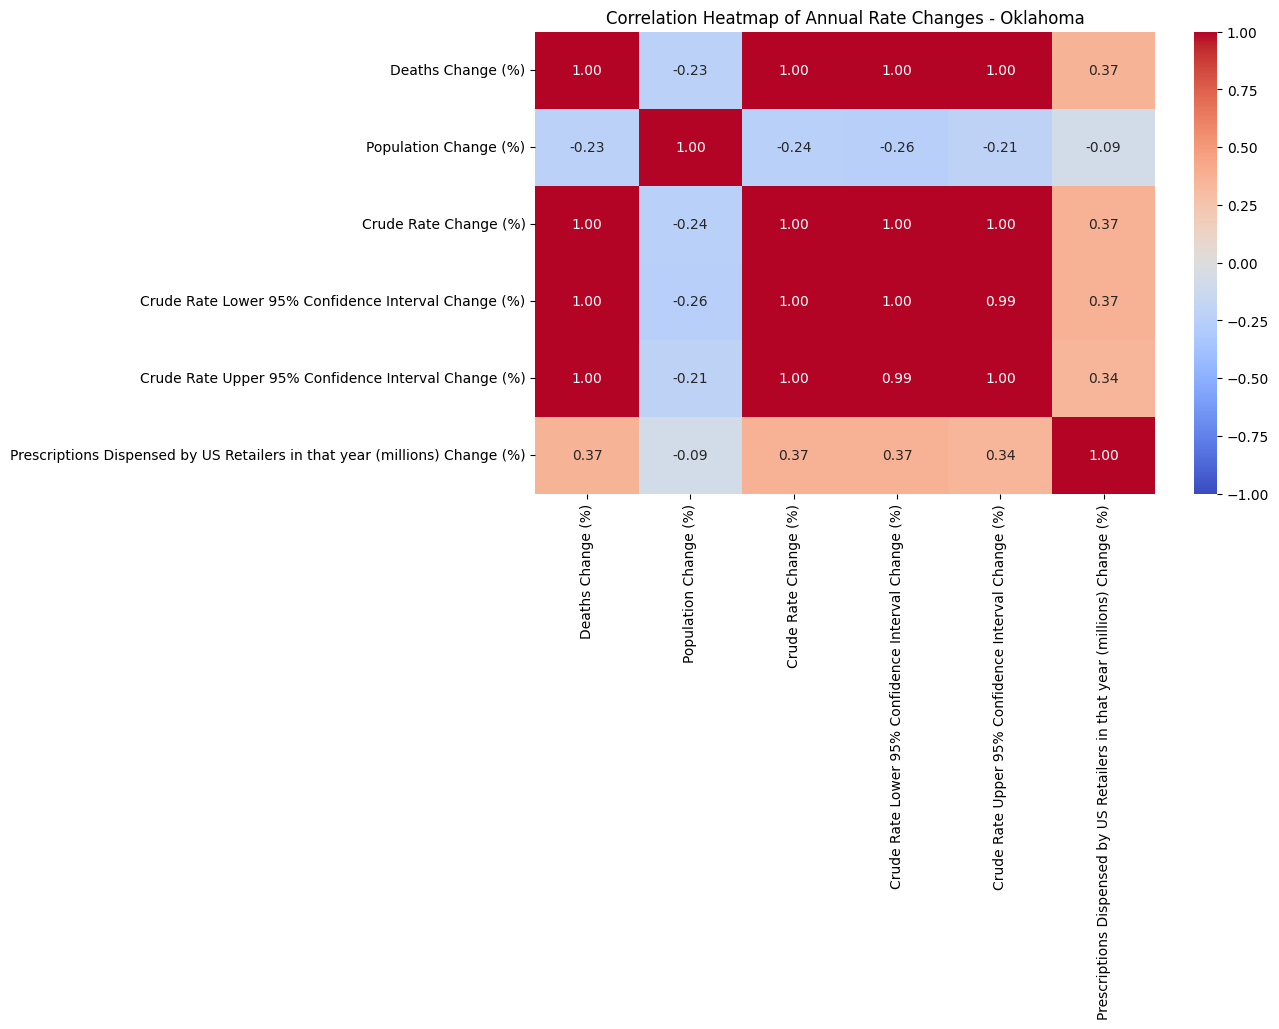

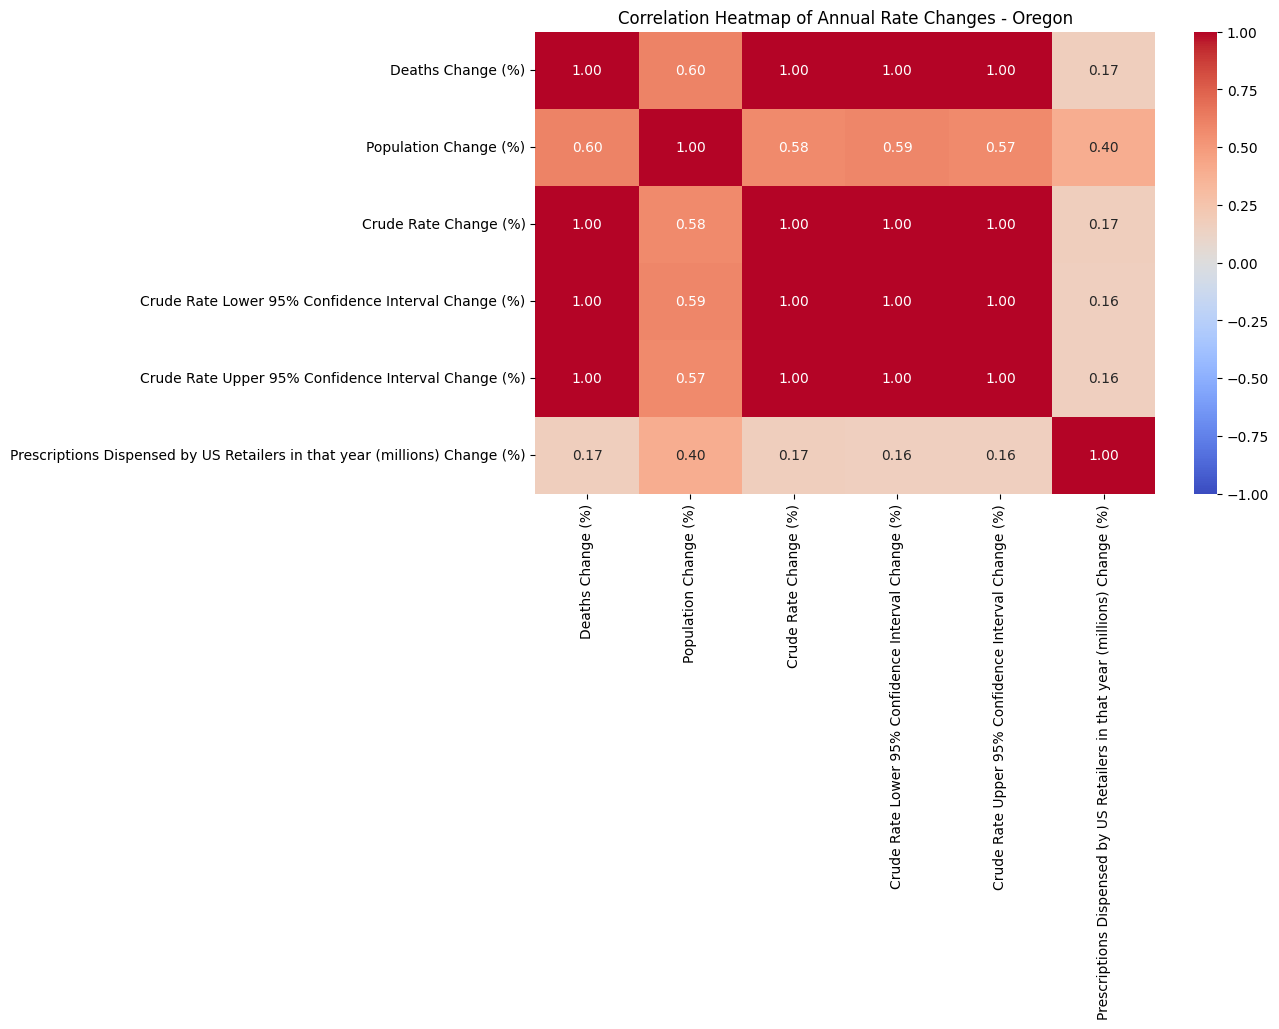

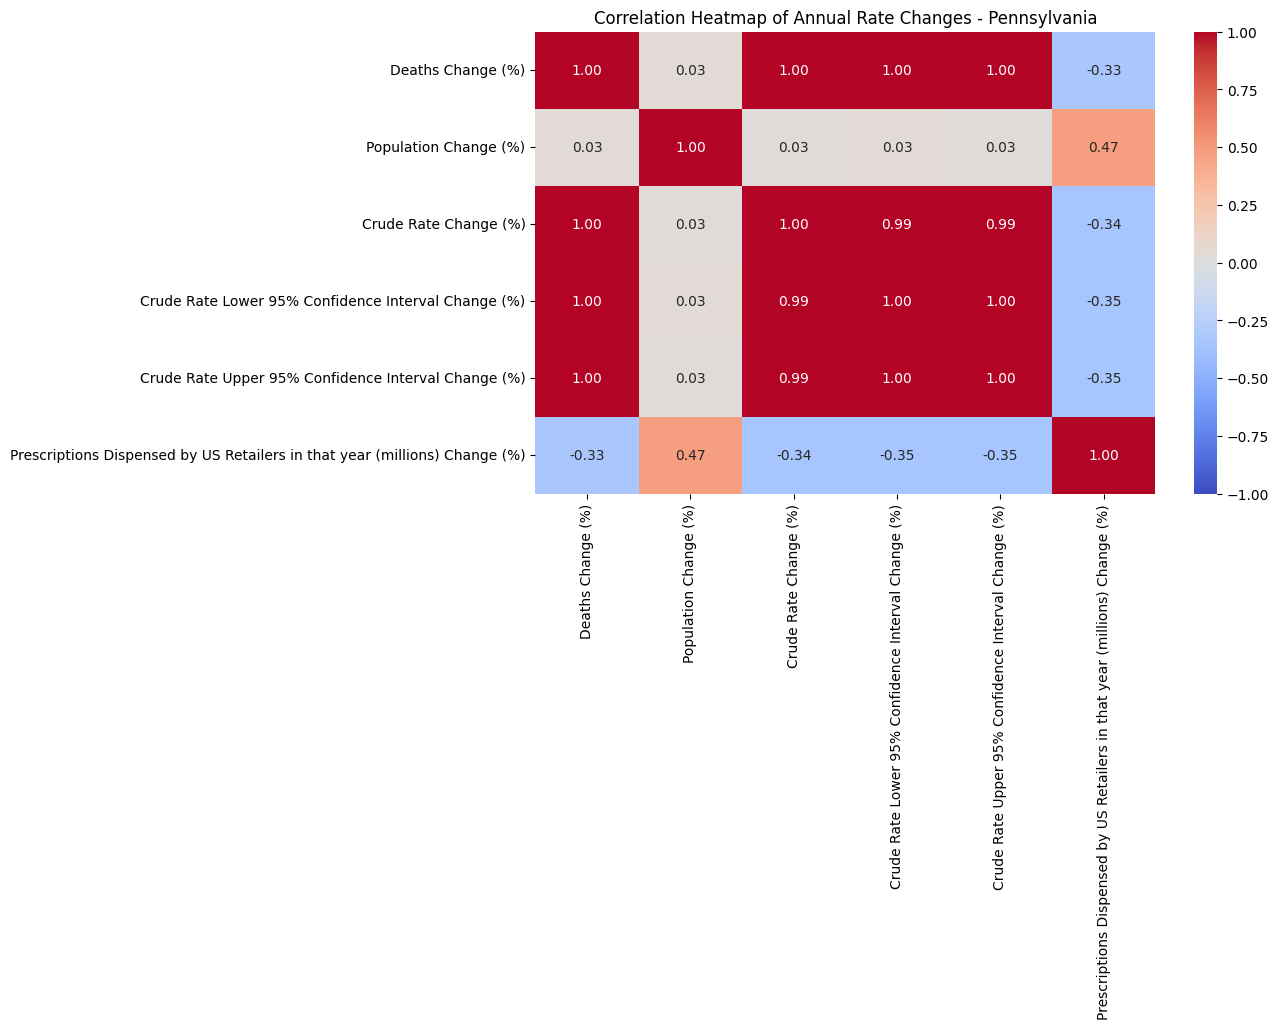

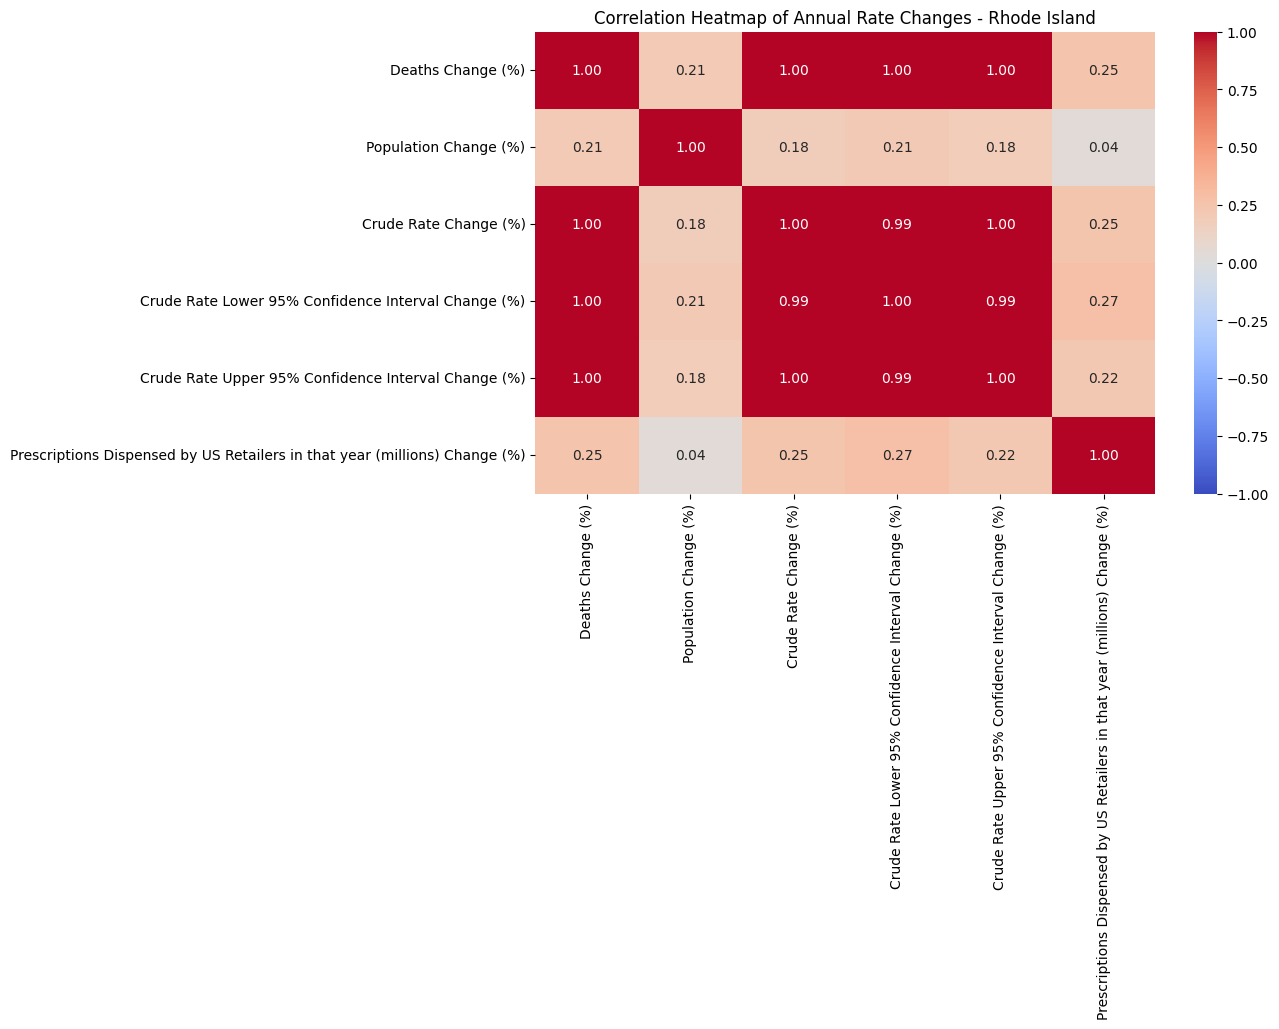

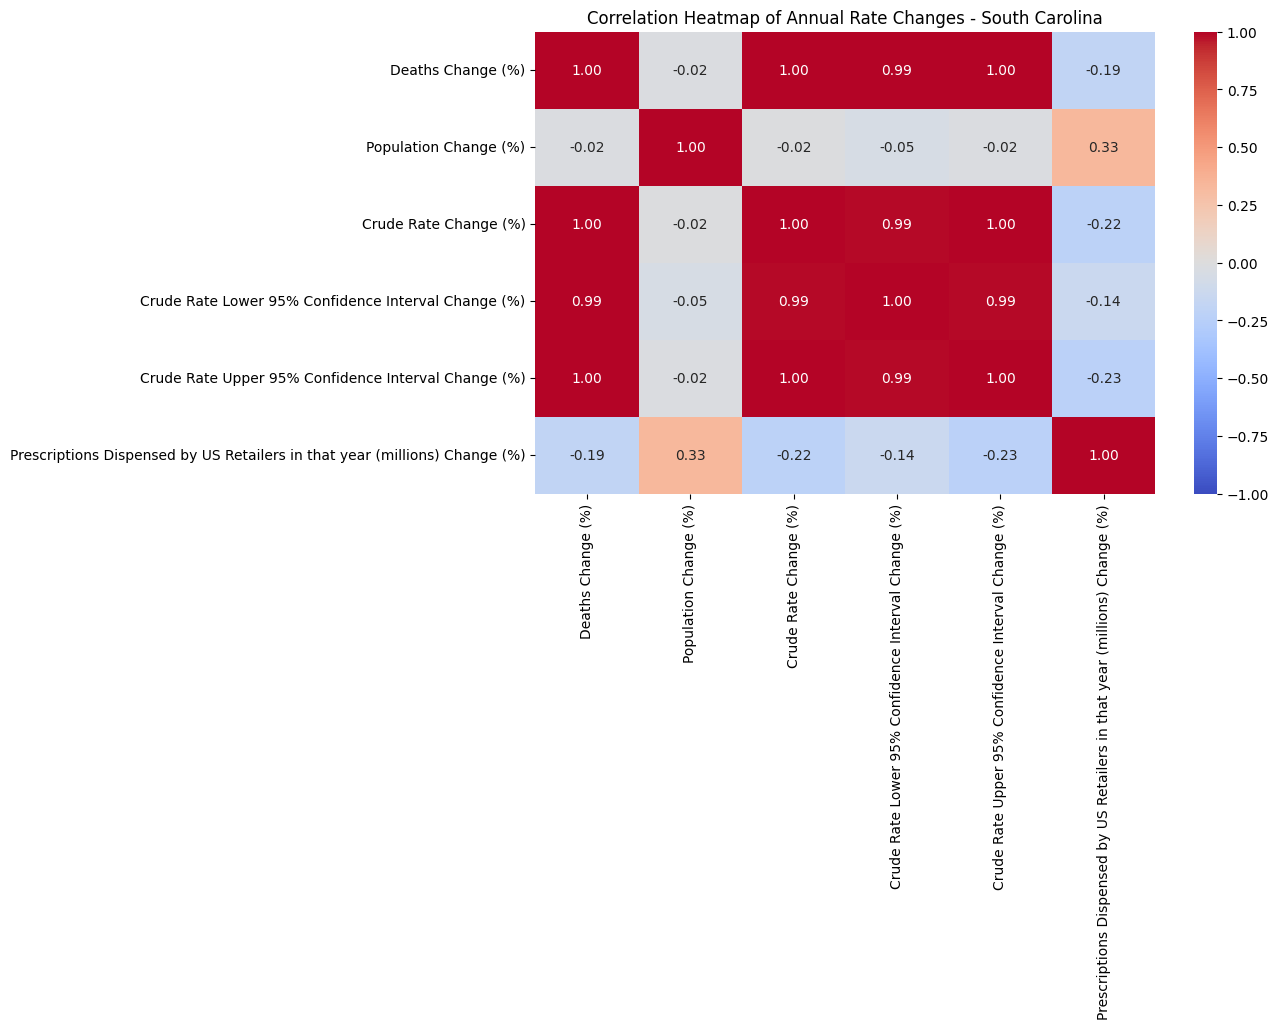

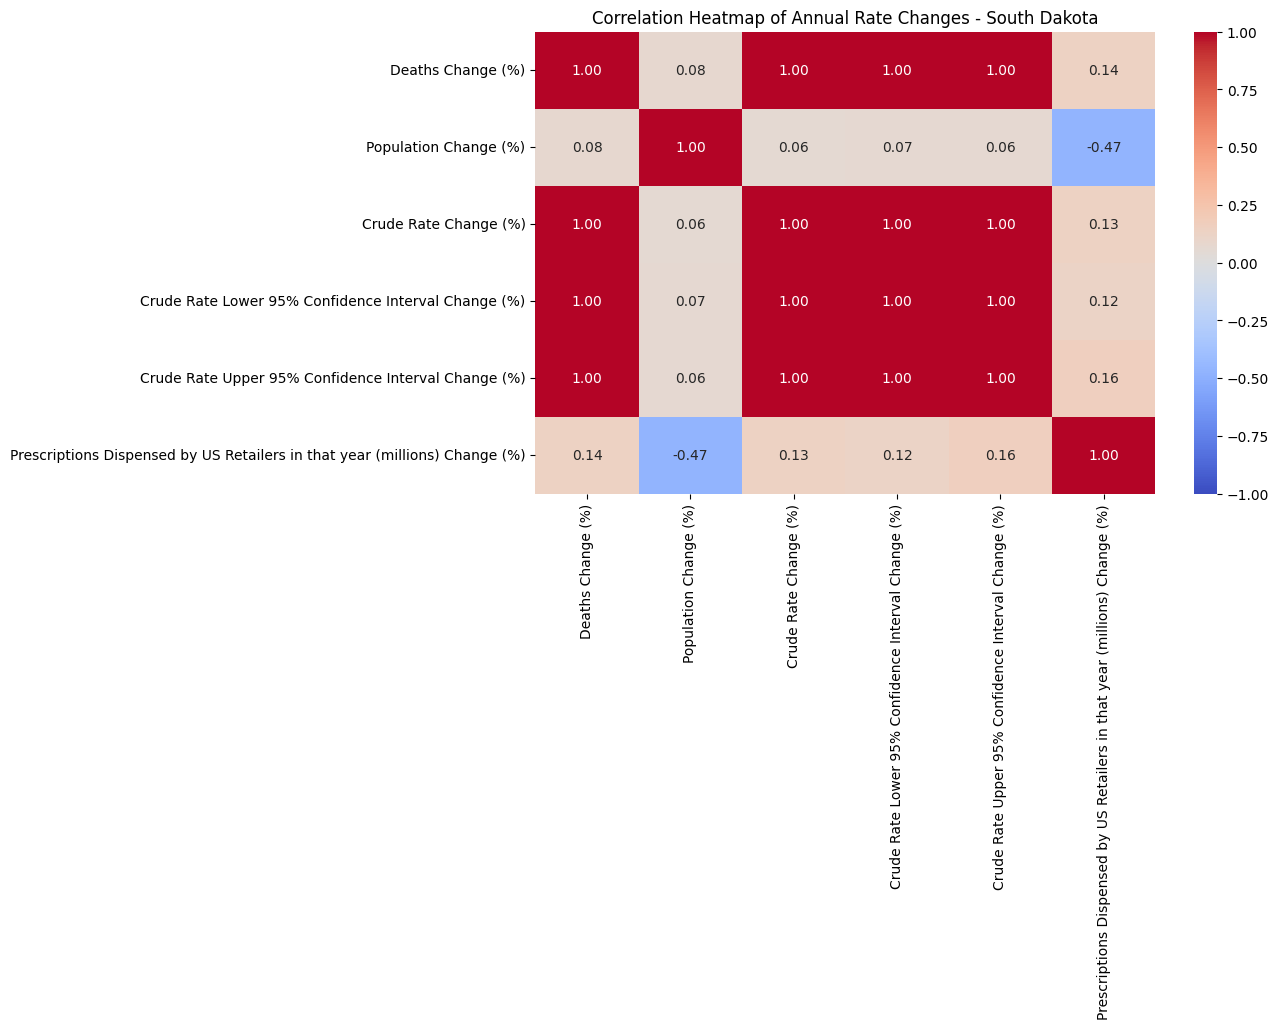

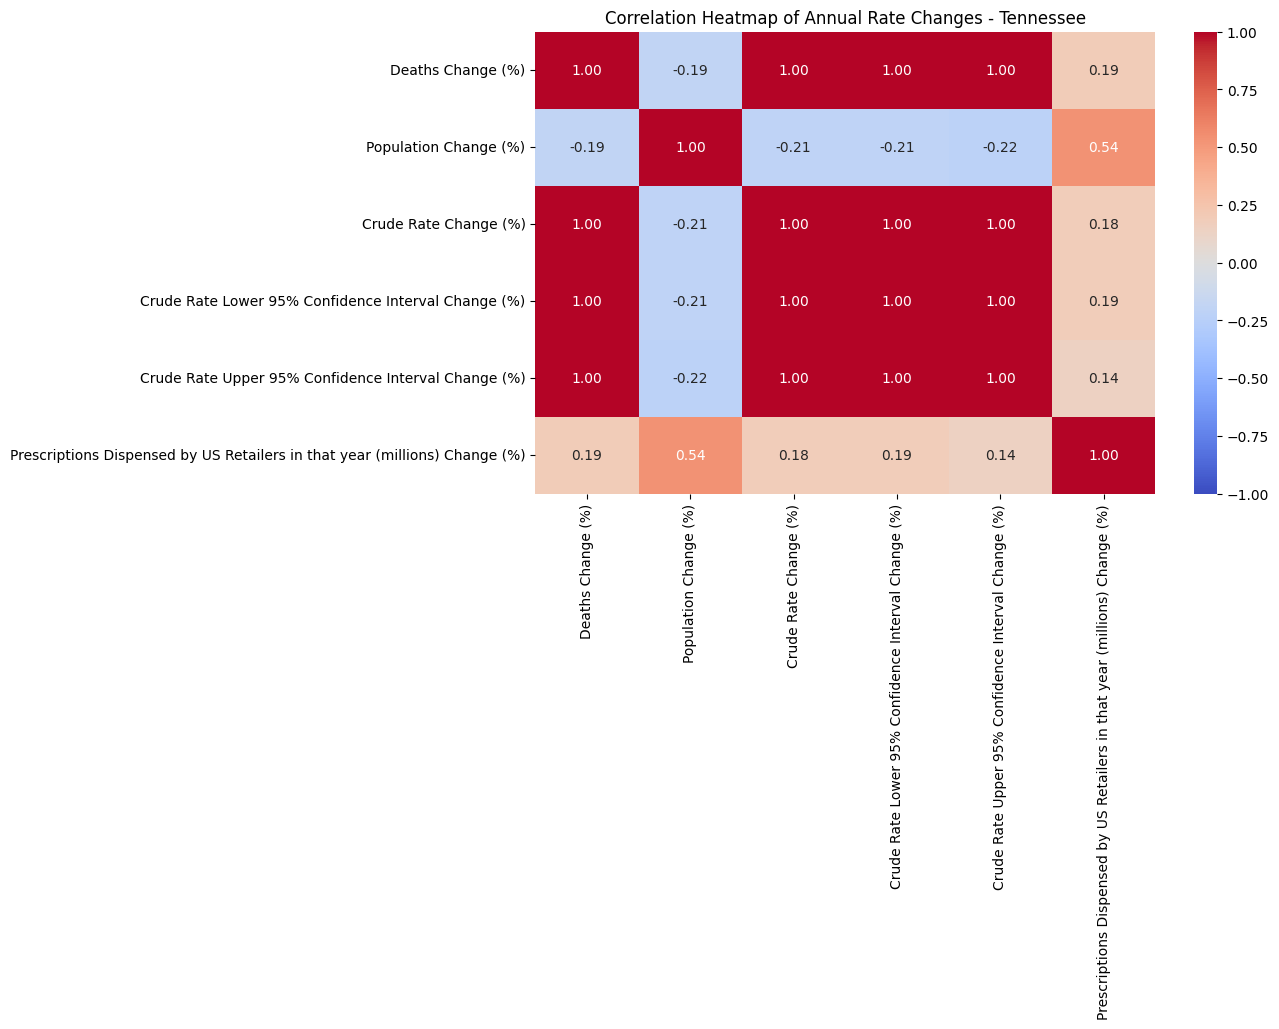

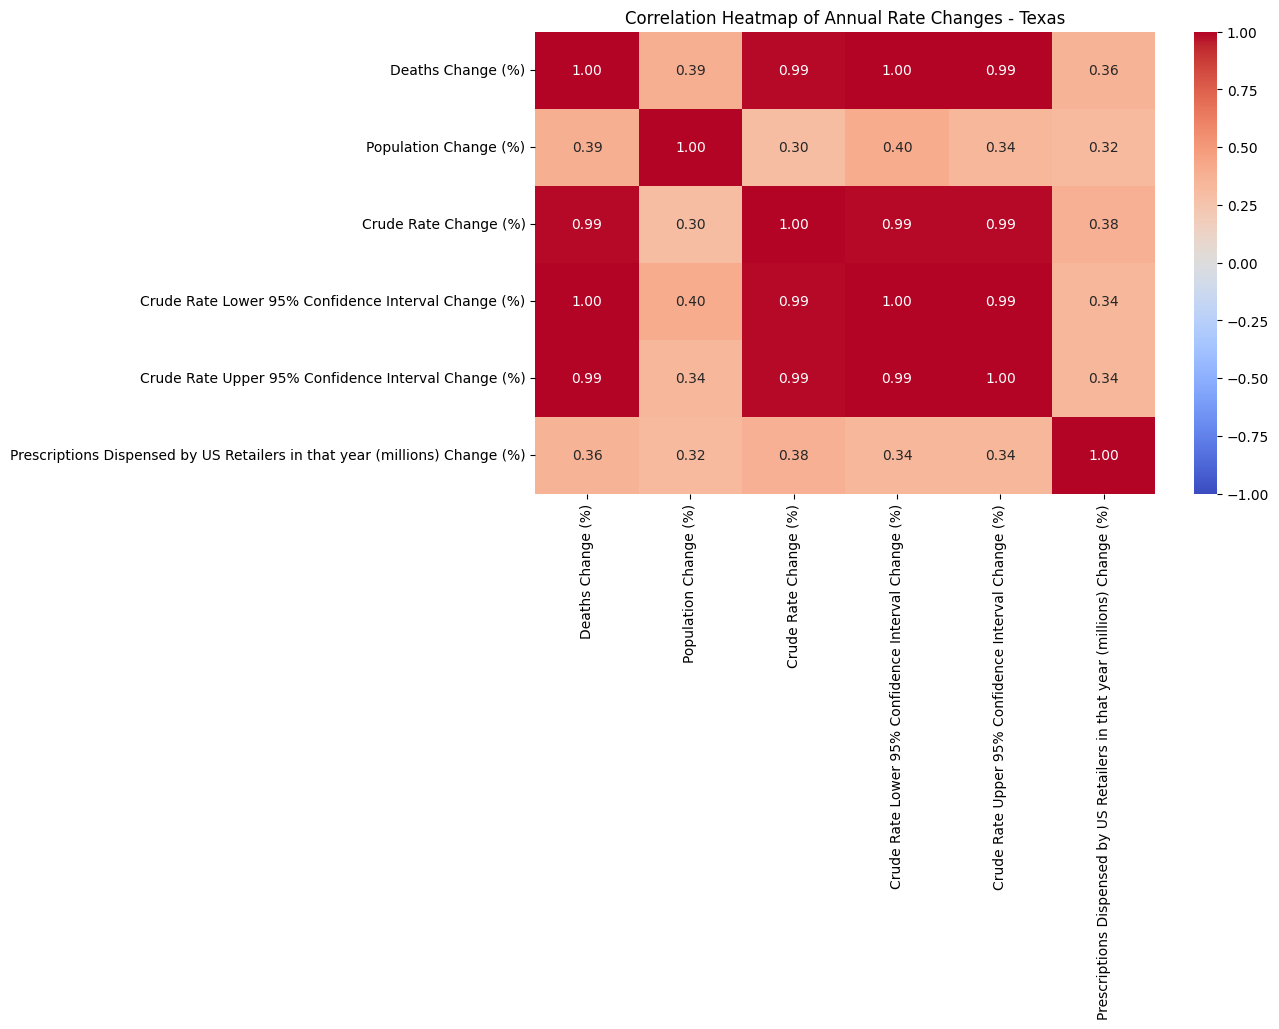

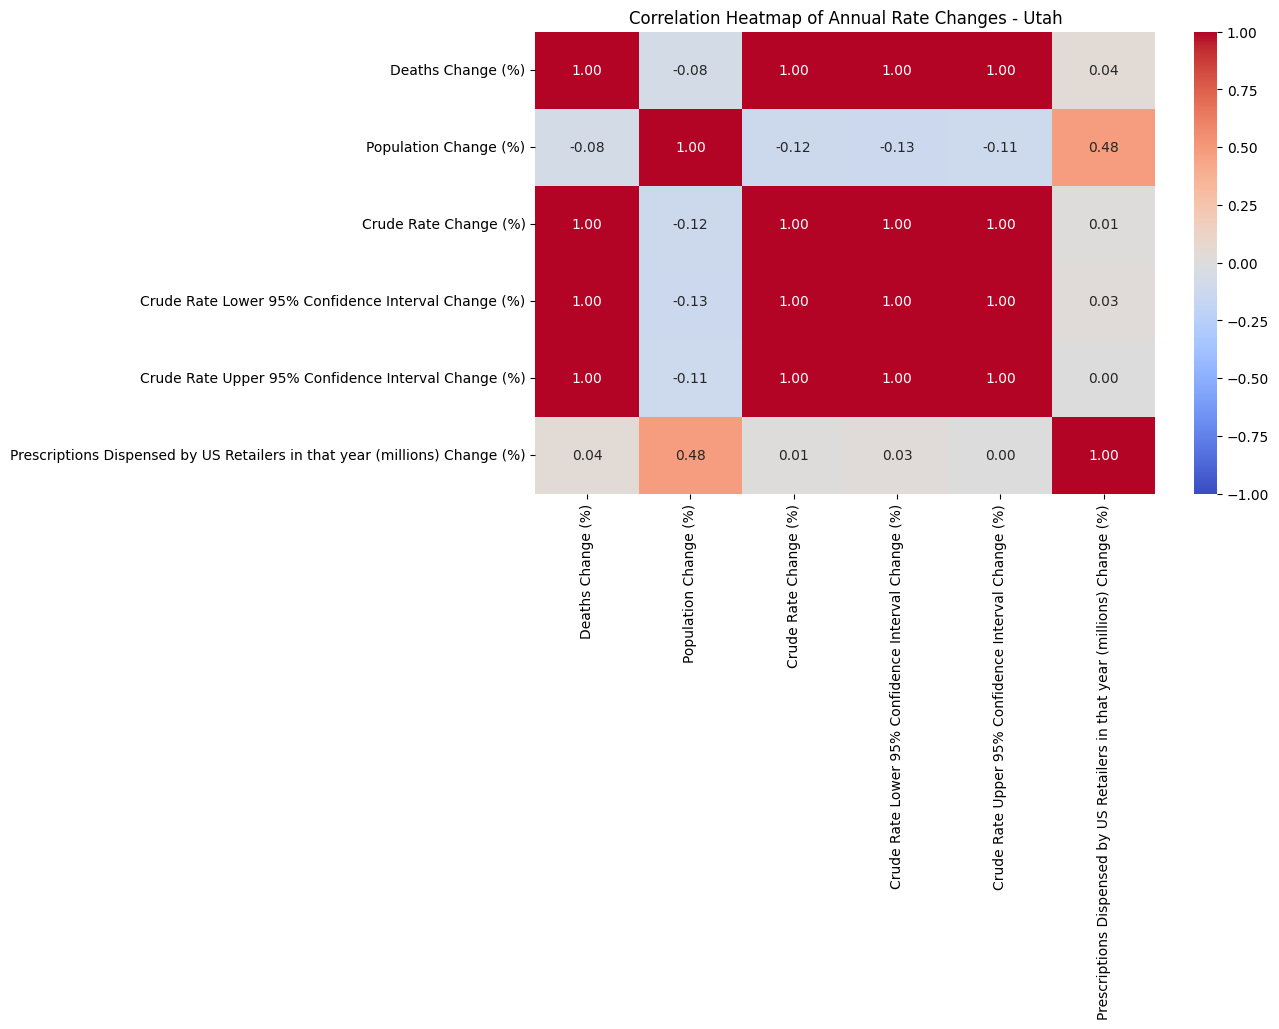

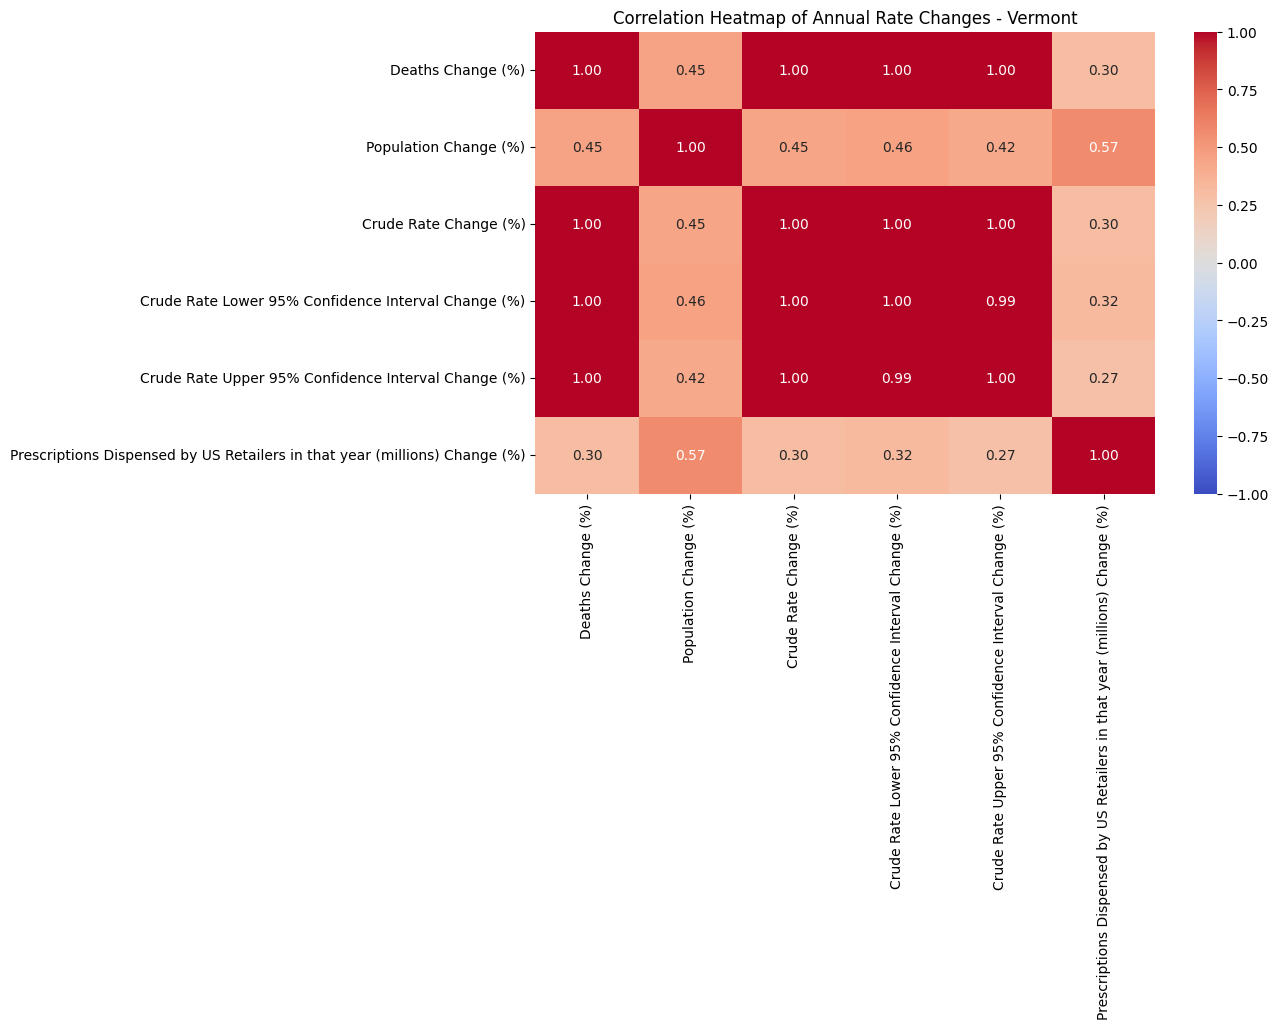

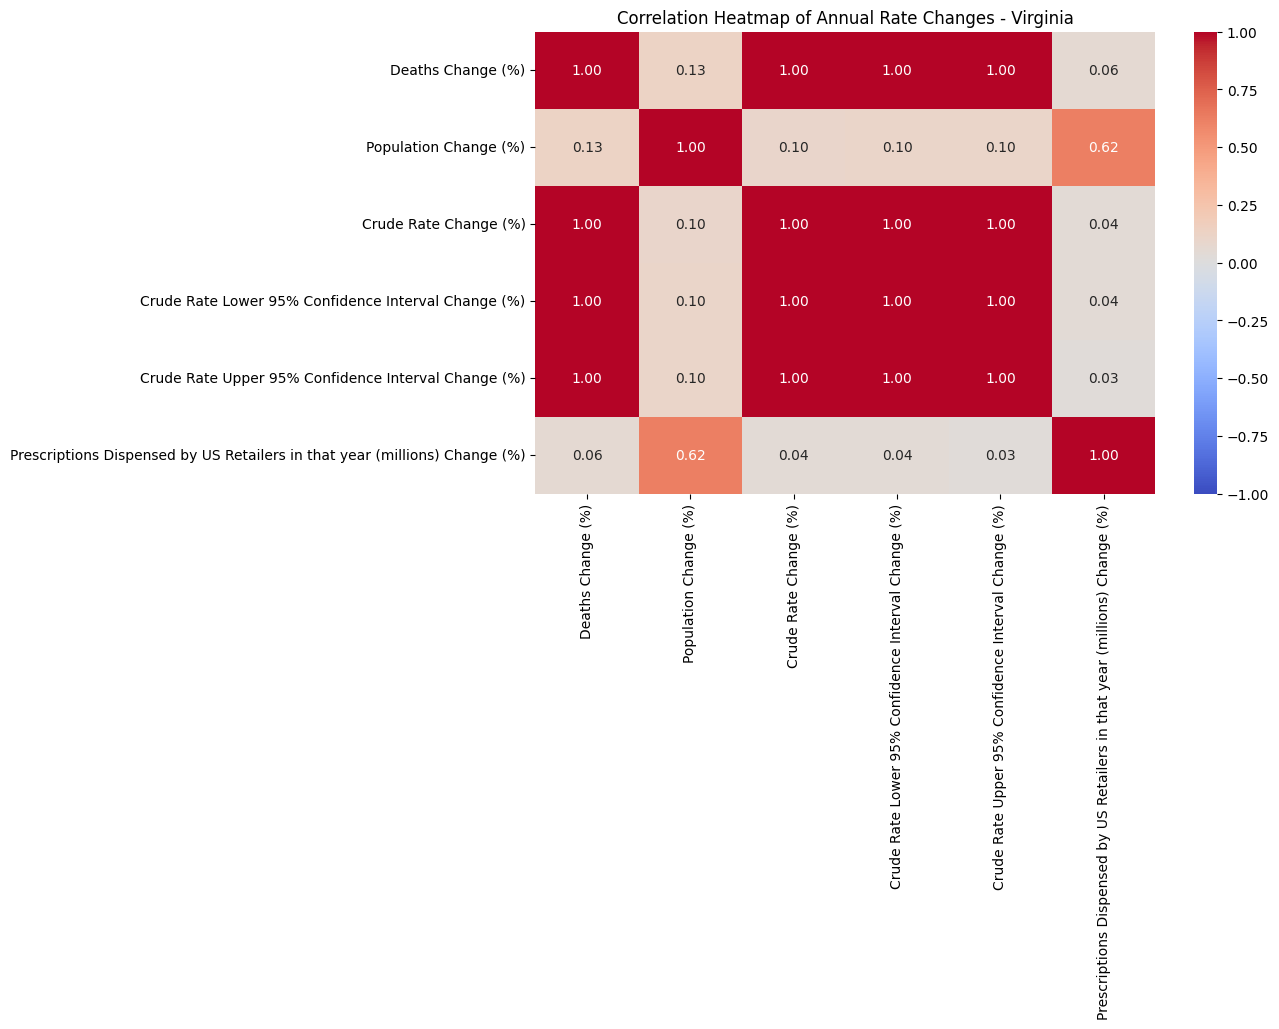

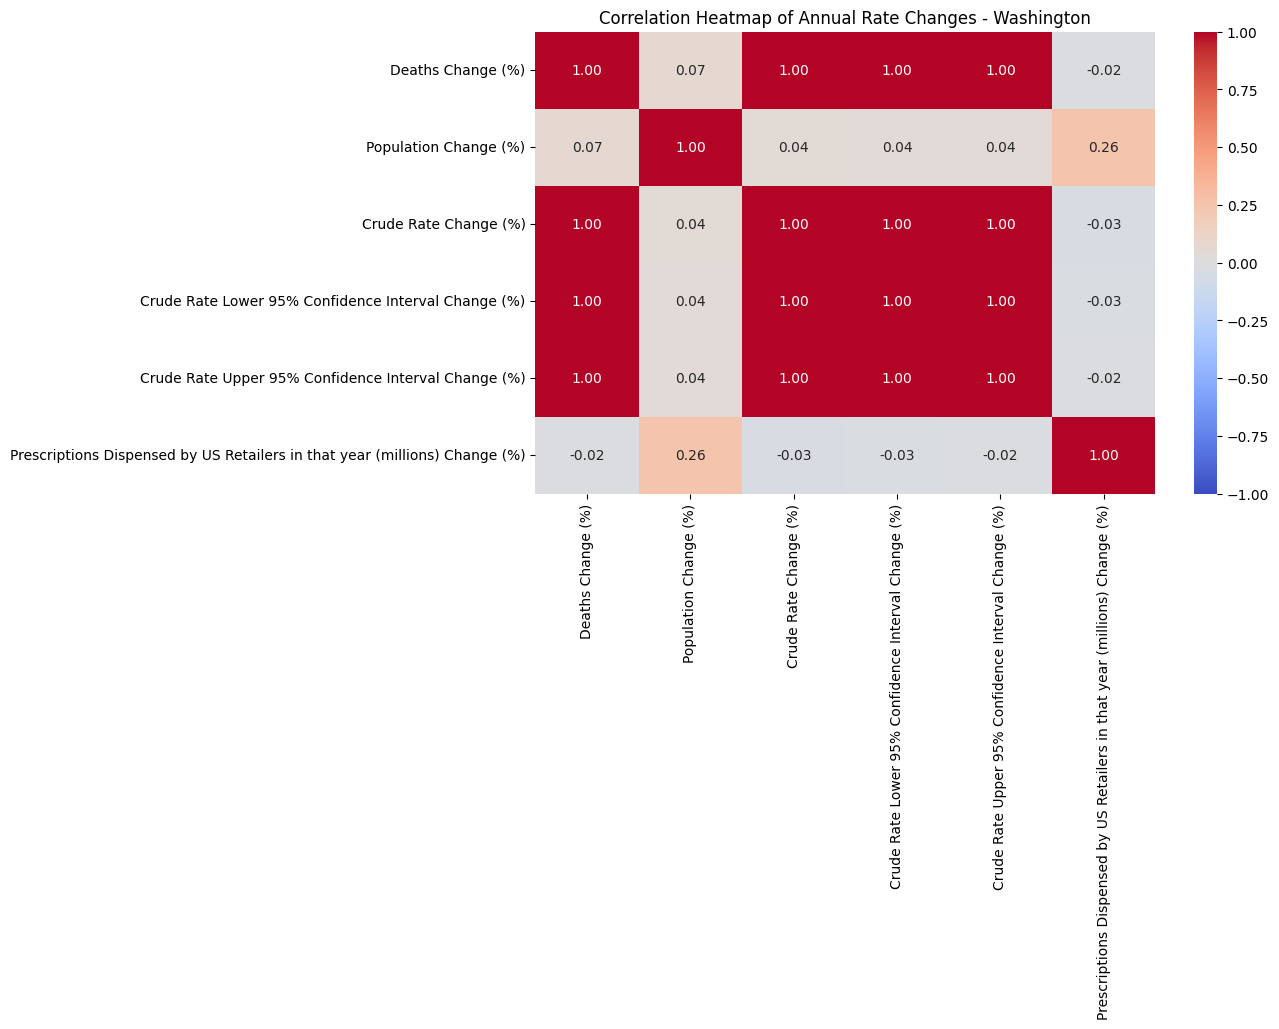

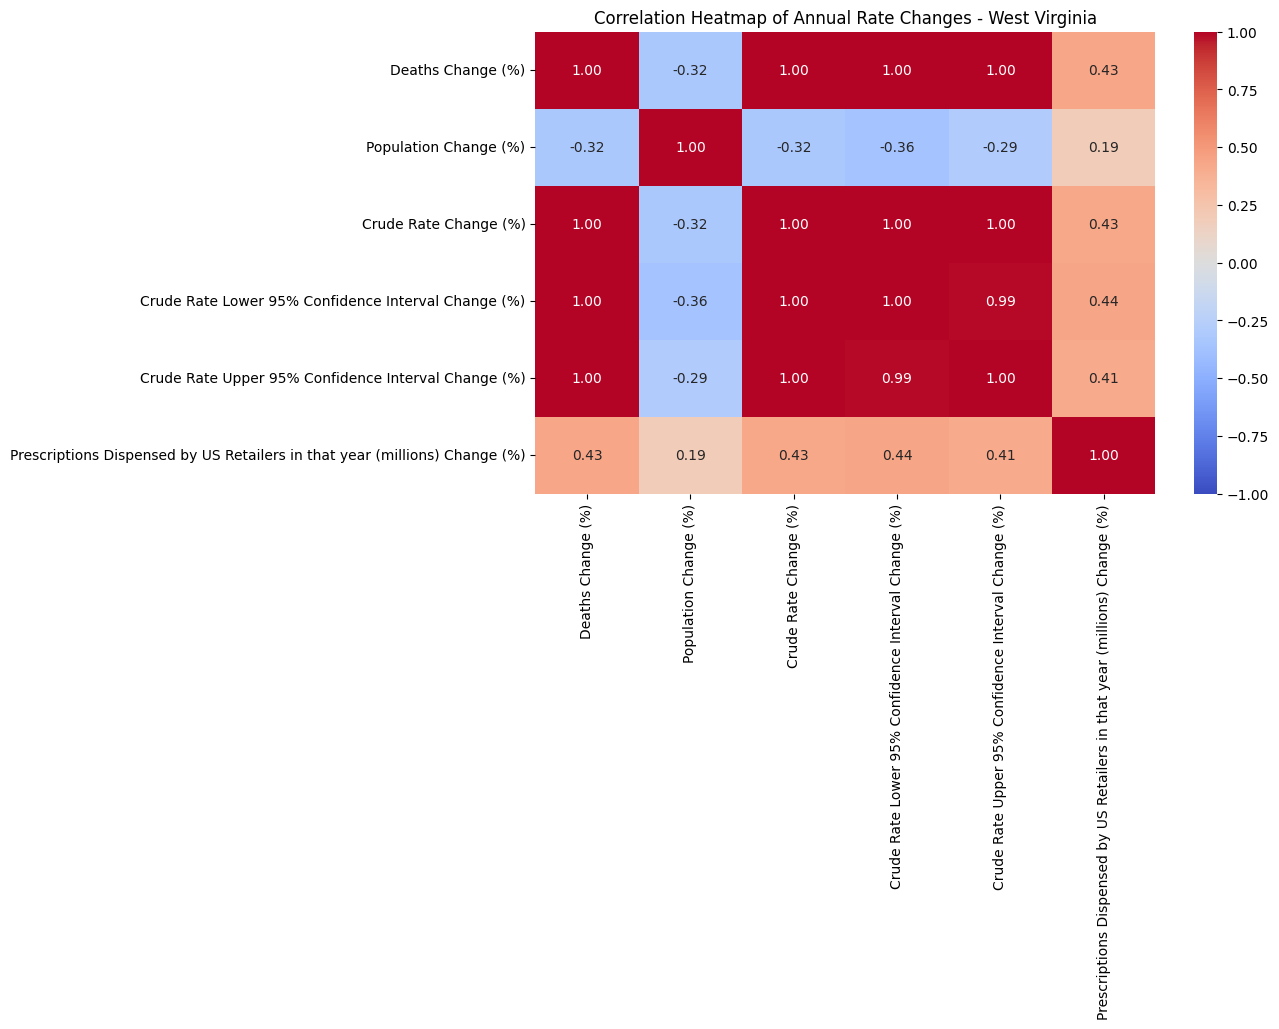

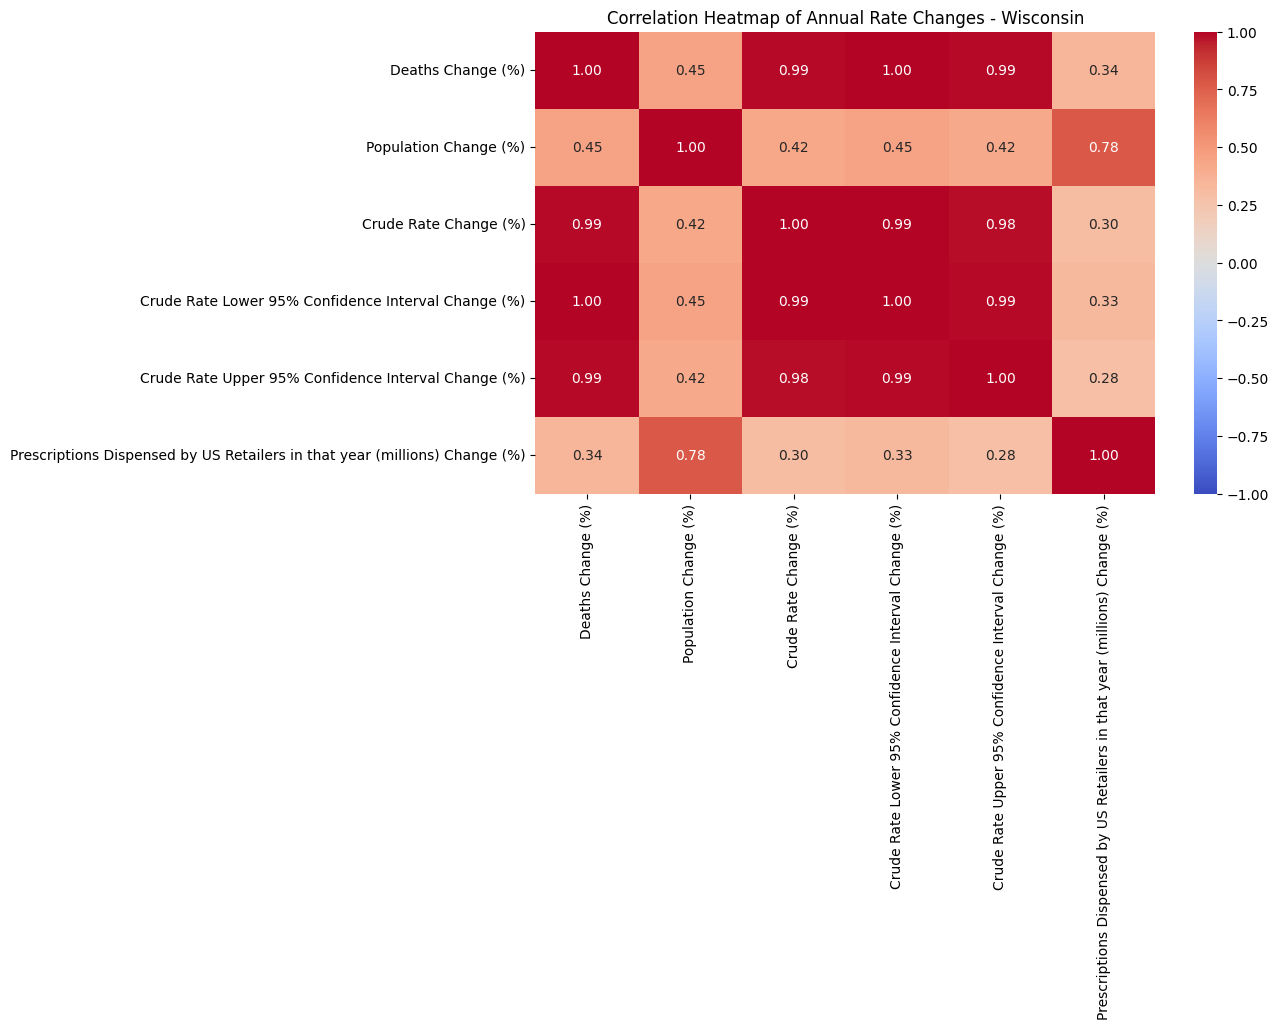

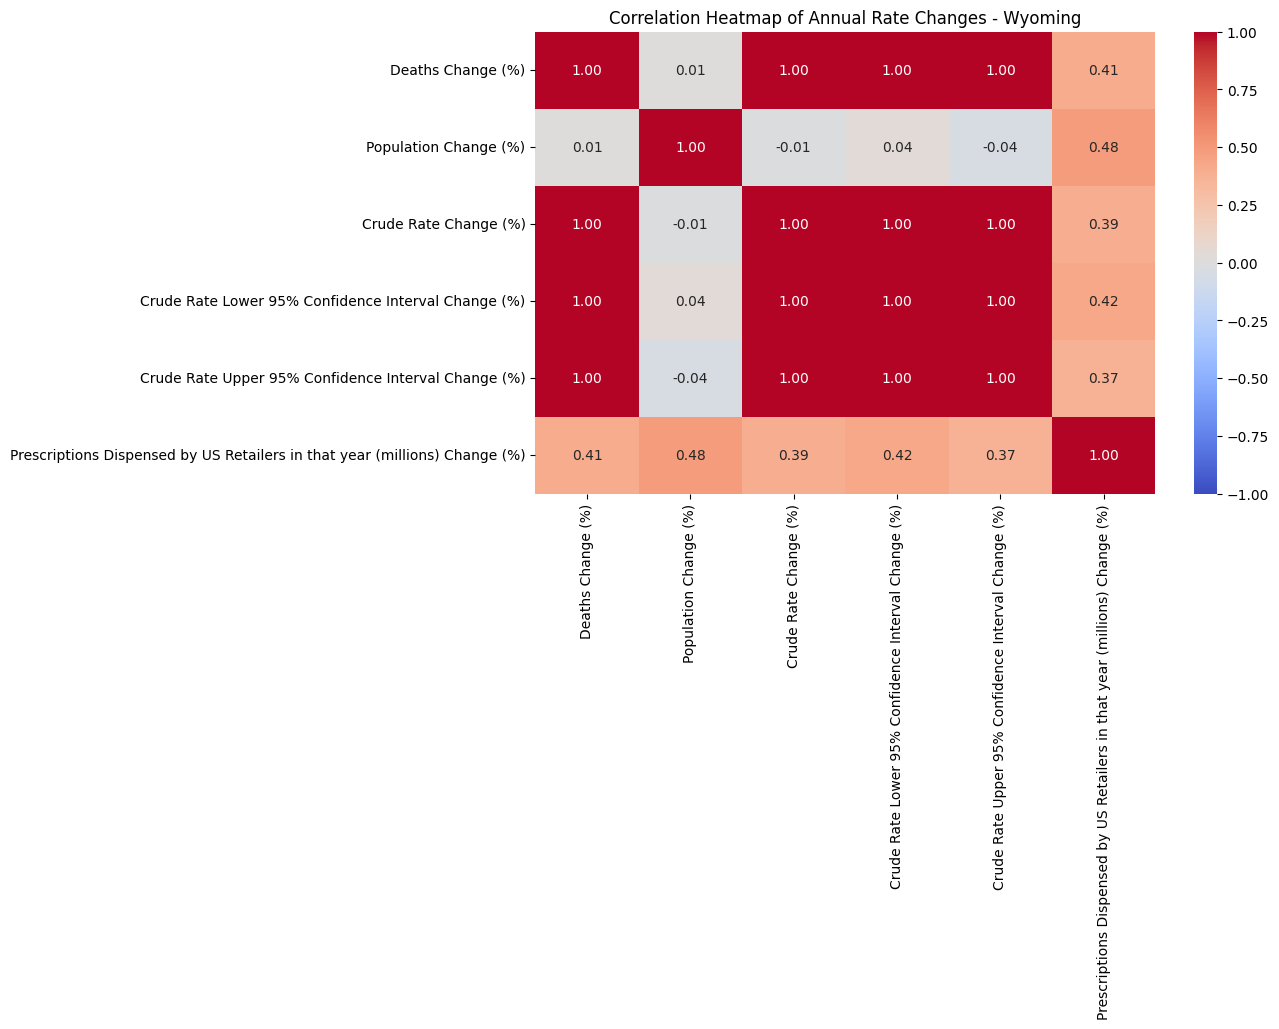

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
data_path = 'data/cleaned_multiple_cause_of_death.csv'
df = pd.read_csv(data_path)

# Convert necessary columns to numeric
numeric_columns = ["Deaths", "Population", "Crude Rate", 
                   "Crude Rate Lower 95% Confidence Interval",
                   "Crude Rate Upper 95% Confidence Interval",
                   "Prescriptions Dispensed by US Retailers in that year (millions)"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort by state and year
df_sorted = df.sort_values(by=["State", "Year"]).copy()

# Compute Year-over-Year percentage changes for each state
for col in numeric_columns:
    df_sorted[f"{col} Change (%)"] = df_sorted.groupby("State")[col].pct_change() * 100

# Drop first year for each state (NaN values from pct_change)
df_change = df_sorted.dropna()

# Keep only change-to-change correlation data
change_columns = [col for col in df_change.columns if "Change (%)" in col]
df_change = df_change[["State", "Year"] + change_columns]

# Function to generate heatmaps for each state
def plot_state_correlation_heatmaps(df_change):
    """
    Generates correlation heatmaps for each state based on their annual rate changes.
    """
    states = df_change["State"].unique()
    
    for state in states:
        # Filter data for the specific state
        state_df = df_change[df_change["State"] == state].drop(columns=["State", "Year"])
        
        # Compute correlation matrix
        state_corr = state_df.corr()
        
        # Plot heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(state_corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
        plt.title(f"Correlation Heatmap of Annual Rate Changes - {state}")
        plt.savefig(f"data/state_correlation_heatmap_{state}.png")
        plt.show()

# Generate heatmaps for all states
plot_state_correlation_heatmaps(df_change)


In [2]:
# --- Identify Missing States Before Heatmap Generation ---
print("\nChecking for missing states before generating heatmaps...")

# Load original cleaned dataset
df_cleaned = pd.read_csv("data/cleaned_multiple_cause_of_death.csv")
original_states = set(df_cleaned["State"].unique())

# Extract states from dataset after computing percentage changes
df_change_states = set(df_change["State"].unique())

# Identify missing states
missing_states = original_states - df_change_states

# Print missing states if any
if missing_states:
    print("States missing before heatmap generation:")
    print(", ".join(sorted(missing_states)))
else:
    print("No states were lost before heatmap generation.")

print("\nProceeding with heatmap generation...")



Checking for missing states before generating heatmaps...
No states were lost before heatmap generation.

Proceeding with heatmap generation...
